In [1]:
#*******************************************************************************************
 #
 #  File Name:  pymaceuticals.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, pymaceuticals.ipynb, reads from the folder, 
 #      resources, two csv files, mouse_study_data.csv and mouse_study_results.csv, 
 #      which contain data about a pharmaceutical company's most recent animal study. 
 #      In this study, two hundred forty-nine tumor-ridden mice, received treatment 
 #      from a range of drug regimens. Over the course of 45 days, technicians observed 
 #      and measured tumor development. The purpose of this study is to compare the 
 #      performance of Pymaceuticals’ drug of interest, Capomulin, against the other 
 #      treatment regimens. This Python script generates all of the tables and 
 #      figures needed for a technical report of this clinical study.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/18/2023      Initial Development                     Nicholas J. George
 #
 #******************************************************************************************/

import logx
import matplotlibx
import pandasx

import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

In [2]:
CONSTANT_LOCAL_FILE_NAME = 'pymaceuticals.ipynb'


CONSTANT_MOUSE_INFO_CSV_FILE_PATH = './resources/mouse_study_data.csv'

CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH = './resources/mouse_study_results.csv'


logx.set_log_mode(False)

logx.set_image_mode(False)


logx.begin_program('pymaceuticals')

In [3]:
#*******************************************************************************************
 #
 #  Subroutine Name:  display_tumor_volume_statistics
 #
 #  Subroutine Description:
 #      This subroutine calculates and displays summary statistics for each drug.
 #
 #
 #  Subroutine Parameters:
 #
 #  Type    Name            Description
 #  -----   -------------   ----------------------------------------------
 #  list    tumor_volume_series_list
 #                          The parameter is the list of tumor volume series 
 #                          for each drug regimen.
 #  list    regimen_string_list
 #                          The parameter is the list of drug regimen names.
 #  string  section_name_string
 #                          The parameter is the section name.
 #  string  type_string     The parameter is the statistics type.
 #
 #
 #  Date                Description                                 Programmer
 #  ---------------     ------------------------------------        ------------------
 #  8/19/2023           Initial Development                         Nicholas J. George
 #
 #******************************************************************************************/

def display_tumor_volume_statistics \
        (tumor_volume_series_list,
         regimen_string_list,
         section_name_string,
         type_string):
    
    for index, regimen in enumerate(regimen_string_list):
            
        statistics_dataframe \
            = pandasx.return_summary_statistics_as_dataframe \
                (tumor_volume_series_list[index])
            
        caption_string \
            = 'Table ' \
              + section_name_string \
              + f'.{index+1}: ' \
              + type_string \
              + f' Statistics for {regimen}'
            
        current_styler_object \
            = pandasx.return_standard_format_styler \
                (statistics_dataframe, caption_string)
        
        current_styler_object \
            = pandasx.save_image_and_return_styler \
                (current_styler_object, caption_string)

        
        display(current_styler_object)

# <br> **Section 1: Extraction**

## **Section 1.1: Read CSV Files**

###  **Create DataFrames**

In [4]:
data_type_dictionary \
    = {'Mouse ID': str,
       'Drug Regimen':	str,
       'Sex': str,
       'Age_months': int,
       'Weight (g)': float}

mouse_info_dataframe \
    = pd.read_csv(CONSTANT_MOUSE_INFO_CSV_FILE_PATH, dtype = data_type_dictionary)

logx.log_write_object(mouse_info_dataframe)

In [5]:
data_type_dictionary \
    = {'Mouse ID': str,
       'Timepoint': int,
       'Tumor Volume (mm3)': float,
       'Metastatic Sites': int}

mouse_study_dataframe \
    = pd.read_csv(CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH, dtype = data_type_dictionary)

logx.log_write_object(mouse_study_dataframe)

###  **Merge DataFrames**

In [6]:
complete_medical_study_dataframe \
    = pd.merge \
        (mouse_info_dataframe,
         mouse_study_dataframe,
         how = 'left',
         on = 'Mouse ID')

complete_medical_study_dataframe \
    .rename \
        (columns \
             = {'Mouse ID': 'mouse_id', 
                'Drug Regimen': 'drug_regimen',
                'Sex': 'sex',
                'Age_months': 'age_months',
                'Weight (g)': 'weight_grams',
                'Timepoint': 'timepoint',
                'Tumor Volume (mm3)': 'tumor_volume_mm3',
                'Metastatic Sites': 'metastatic_sites'},
         inplace = True)

complete_medical_study_dataframe['drug_regimen'] \
    = complete_medical_study_dataframe['drug_regimen'].str.upper()

logx.log_write_object(complete_medical_study_dataframe)

### **Display Merged DataFrame**

In [7]:
pandasx.return_formatted_table \
    (complete_medical_study_dataframe,
     'Table 1.1: Complete Medical Study DataFrame')

mouse_id,drug_regimen,sex,age_months,weight_grams,timepoint,tumor_volume_mm3,metastatic_sites
k403,RAMICANE,Male,21,16.00,0,45.00,0
k403,RAMICANE,Male,21,16.00,5,38.83,0
k403,RAMICANE,Male,21,16.00,10,35.01,1
k403,RAMICANE,Male,21,16.00,15,34.22,1
k403,RAMICANE,Male,21,16.00,20,33.00,1
k403,RAMICANE,Male,21,16.00,25,33.46,1
k403,RAMICANE,Male,21,16.00,30,31.10,1
k403,RAMICANE,Male,21,16.00,35,26.55,1
k403,RAMICANE,Male,21,16.00,40,24.37,1
k403,RAMICANE,Male,21,16.00,45,22.05,1


## **Section 1.2: Remove Mouse IDs with Duplicate Timepoints**

### **Display the Number of Unique Mouse IDs**

In [8]:
unique_mouse_id_count_integer = complete_medical_study_dataframe['mouse_id'].nunique()

logx.print_and_log_text \
    ('\033[1m' \
     + 'The number of unique mouse IDs in the complete medical study DataFrame is ' \
     + '{:,}.'.format(unique_mouse_id_count_integer) \
     + '\033[0m')

The number of unique mouse IDs in the complete medical study DataFrame is 249.


### **Check for Any Mouse IDs with Duplicate Timepoints**

In [9]:
duplicate_mouse_dataframe \
    = complete_medical_study_dataframe \
        [complete_medical_study_dataframe.duplicated(subset = ['mouse_id', 'timepoint'])]

logx.log_write_object(duplicate_mouse_dataframe)

### **Display Mouse IDs with Duplicate Timepoints**

In [10]:
pandasx.return_formatted_table \
    (duplicate_mouse_dataframe,
     'Table 1.2.1: Mouse IDs with Duplicate Timepoints')

mouse_id,drug_regimen,sex,age_months,weight_grams,timepoint,tumor_volume_mm3,metastatic_sites
g989,PROPRIVA,Female,21,26.00,0,45.00,0
g989,PROPRIVA,Female,21,26.00,5,47.57,0
g989,PROPRIVA,Female,21,26.00,10,49.88,0
g989,PROPRIVA,Female,21,26.00,15,53.44,0
g989,PROPRIVA,Female,21,26.00,20,54.66,1


### **Display All Mouse IDs with Duplicate Timepoints Records**

In [11]:
duplicate_mouse_id_string_list \
    = duplicate_mouse_dataframe['mouse_id'].unique().tolist()

logx.log_write_object(duplicate_mouse_id_string_list)

In [12]:
temp_dataframe \
    = complete_medical_study_dataframe \
        .apply \
            (lambda row: \
                 row[complete_medical_study_dataframe['mouse_id'].isin(duplicate_mouse_id_string_list)])

pandasx.return_formatted_table \
    (temp_dataframe, 'Table 1.2.2: All Mouse IDs with Duplicate Timepoints Records')

mouse_id,drug_regimen,sex,age_months,weight_grams,timepoint,tumor_volume_mm3,metastatic_sites
g989,PROPRIVA,Female,21,26.00,0,45.00,0
g989,PROPRIVA,Female,21,26.00,0,45.00,0
g989,PROPRIVA,Female,21,26.00,5,48.79,0
g989,PROPRIVA,Female,21,26.00,5,47.57,0
g989,PROPRIVA,Female,21,26.00,10,51.75,0
g989,PROPRIVA,Female,21,26.00,10,49.88,0
g989,PROPRIVA,Female,21,26.00,15,51.33,1
g989,PROPRIVA,Female,21,26.00,15,53.44,0
g989,PROPRIVA,Female,21,26.00,20,55.33,1
g989,PROPRIVA,Female,21,26.00,20,54.66,1


### **Clean Medical Study DataFrame without Mouse IDs with Duplicate Timepoints Records**

In [13]:
clean_medical_study_dataframe \
    = complete_medical_study_dataframe \
        .apply \
            (lambda row: \
                 row[~complete_medical_study_dataframe['mouse_id'].isin(duplicate_mouse_id_string_list)])

logx.log_write_object(clean_medical_study_dataframe)

### **Display the Updated Number of Unique Mouse IDs**

In [14]:
unique_mouse_id_count_integer = clean_medical_study_dataframe['mouse_id'].nunique()

logx.print_and_log_text \
    ('\033[1m' \
     + 'The updated number of unique mouse IDs in the complete medical study ' \
     + 'DataFrame is {:,}.'.format(unique_mouse_id_count_integer) \
     + '\033[0m')

The updated number of unique mouse IDs in the complete medical study DataFrame is 248.


# <br> **Section 2: Tumor Volume Summary Statistics**

## **Section 2.1: Statistical Calculations**

### **New Medical Study DataFrame Grouped by Drug Regimen**

In [15]:
grouped_by_regimen_dataframe = clean_medical_study_dataframe.groupby('drug_regimen')

logx.log_write_object(grouped_by_regimen_dataframe)

### **Tumor Volume (Mean)**

In [16]:
mean_tumor_volume_series = grouped_by_regimen_dataframe['tumor_volume_mm3'].mean()

logx.log_write_object(mean_tumor_volume_series)

### **Tumor Volume (Median)**

In [17]:
median_tumor_volume_series = grouped_by_regimen_dataframe['tumor_volume_mm3'].median()

logx.log_write_object(median_tumor_volume_series)

### **Tumor Volume (Variance)**

In [18]:
variance_tumor_volume_series = grouped_by_regimen_dataframe['tumor_volume_mm3'].var()

logx.log_write_object(variance_tumor_volume_series)

### **Tumor Volume (Standard Deviation)**

In [19]:
std_tumor_volume_series = grouped_by_regimen_dataframe['tumor_volume_mm3'].std()

logx.log_write_object(std_tumor_volume_series)

### **Tumor Volume (Standard Errror of the Mean)**

In [20]:
sem_tumor_volume_series = grouped_by_regimen_dataframe['tumor_volume_mm3'].sem()

logx.log_write_object(sem_tumor_volume_series)

### **Tumor Volume Summary Statistics DataFrame**

In [21]:
tumor_volume_statistics_dataframe \
    = pd.DataFrame \
        ({'mean': mean_tumor_volume_series,
          'median': median_tumor_volume_series,
          'variance': variance_tumor_volume_series,
          'std': std_tumor_volume_series,
          'sem': sem_tumor_volume_series})

logx.log_write_object(tumor_volume_statistics_dataframe)

## **Section 2.2: Display Summary Statistics (Tumor Volume)**

### **Display Summary Statistics**

In [22]:
pandasx.return_formatted_table \
    (tumor_volume_statistics_dataframe, 'Table 2.2.1: Summary Statistics (Tumor Volume)')

mean,median,variance,std,sem
40.68,41.56,24.95,4.99,0.33
52.59,51.78,39.29,6.27,0.47
52.88,51.82,43.13,6.57,0.49
55.24,53.70,68.55,8.28,0.60
54.33,52.51,66.17,8.13,0.60
54.03,52.29,61.17,7.82,0.58
52.32,50.45,43.85,6.62,0.54
40.22,40.67,23.49,4.85,0.32
54.23,52.43,59.45,7.71,0.57
53.24,51.82,48.53,6.97,0.52


 # <br> **Section 3: Tumor Volume Over Time Per Drug Regimen**

## **Section 3.1: Medical Study DataFrame by Drug Regimen**

### **Medical Study DataFrame (Capomulin)**

In [23]:
capomulin_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'CAPOMULIN'), :]

logx.log_write_object(capomulin_study_dataframe)

### **Medical Study DataFrame (Ceftamin)**

In [24]:
ceftamin_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'CEFTAMIN'), :]

logx.log_write_object(ceftamin_study_dataframe)

### **Medical Study DataFrame (Infubinol)**

In [25]:
infubinol_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'INFUBINOL'), :]

logx.log_write_object(infubinol_study_dataframe)

### **Medical Study DataFrame (Ketapril)**

In [26]:
ketapril_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'KETAPRIL'), :]

logx.log_write_object(ketapril_study_dataframe)

### **Medical Study DataFrame (Naftisol)**

In [27]:
naftisol_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'NAFTISOL'), :]

logx.log_write_object(naftisol_study_dataframe)

### **Medical Study DataFrame (Placebo)**

In [28]:
placebo_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'PLACEBO'), :]

logx.log_write_object(placebo_study_dataframe)

### **Medical Study DataFrame (Propriva)**

In [29]:
propriva_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'PROPRIVA'), :]

logx.log_write_object(propriva_study_dataframe)

### **Medical Study DataFrame (Ramicane)**

In [30]:
ramicane_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'RAMICANE'), :]

logx.log_write_object(ramicane_study_dataframe)

### **Medical Study DataFrame (Stelasyn)**

In [31]:
stelasyn_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'STELASYN'), :]

logx.log_write_object(stelasyn_study_dataframe)

### **Medical Study DataFrame (Zoniferol)**

In [32]:
zoniferol_study_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'ZONIFEROL'), :]

logx.log_write_object(zoniferol_study_dataframe)

## **Section 3.2: Random Mouse ID by Drug Regimen**

### **Random Mouse ID Selection (Capomulin)**

In [33]:
rmid_capomulin_string \
    = capomulin_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_capomulin_string)

### **Random Mouse ID Selection (Ceftamin)**

In [34]:
rmid_ceftamin_string \
    = ceftamin_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_ceftamin_string)

### **Random Mouse ID Selection (Infubinol)**

In [35]:
rmid_infubinol_string \
    = infubinol_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_infubinol_string)

### **Random Mouse ID Selection (Ketapril)**

In [36]:
rmid_ketapril_string \
    = ketapril_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_ketapril_string)

### **Random Mouse ID Selection (Naftisol)**

In [37]:
rmid_naftisol_string \
    = naftisol_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_naftisol_string)

### **Random Mouse ID Selection (Placebo)**

In [38]:
rmid_placebo_string \
    = placebo_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_placebo_string)

### **Random Mouse ID Selection (Propriva)**

In [39]:
rmid_propriva_string \
    = propriva_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_propriva_string)

### **Random Mouse ID Selection (Ramicane)**

In [40]:
rmid_ramicane_string \
    = ramicane_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_ramicane_string)

### **Random Mouse ID Selection (Stelasyn)**

In [41]:
rmid_stelasyn_string \
    = stelasyn_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_stelasyn_string)

### **Random Mouse ID Selection (Zoniferol)**

In [42]:
rmid_zoniferol_string \
    = zoniferol_study_dataframe.sample(n = 1, replace = False).iloc[0, 0]

logx.log_write_object(rmid_zoniferol_string)

## **Section 3.3: Mouse Record Retrievel by Drug Regimen**

### **Mouse Data Retrieval (Capomulin)**

In [43]:
capomulin_mouse_dataframe \
    = capomulin_study_dataframe.loc[(capomulin_study_dataframe['mouse_id'] == rmid_capomulin_string), :]

logx.log_write_object(capomulin_mouse_dataframe)

### **Mouse Data Retrieval (Ceftamin)**

In [44]:
ceftamin_mouse_dataframe \
    = ceftamin_study_dataframe.loc[(ceftamin_study_dataframe['mouse_id'] == rmid_ceftamin_string), :]

logx.log_write_object(ceftamin_mouse_dataframe)

### **Mouse Data Retrieval (Infubinol)**

In [45]:
infubinol_mouse_dataframe \
    = infubinol_study_dataframe.loc[(infubinol_study_dataframe['mouse_id'] == rmid_infubinol_string), :]

logx.log_write_object(infubinol_mouse_dataframe)

### **Mouse Data Retrieval (Ketapril)**

In [46]:
ketapril_mouse_dataframe \
    = ketapril_study_dataframe.loc[(ketapril_study_dataframe['mouse_id'] == rmid_ketapril_string), :]

logx.log_write_object(ketapril_mouse_dataframe)

### **Mouse Data Retrieval (Naftisol)**

In [47]:
naftisol_mouse_dataframe \
    = naftisol_study_dataframe.loc[(naftisol_study_dataframe['mouse_id'] == rmid_naftisol_string), :]

logx.log_write_object(naftisol_mouse_dataframe)

### **Mouse Data Retrieval (Placebo)**

In [48]:
placebo_mouse_dataframe \
    = placebo_study_dataframe.loc[(placebo_study_dataframe['mouse_id'] == rmid_placebo_string), :]

logx.log_write_object(placebo_mouse_dataframe)

### **Mouse Data Retrieval (Propriva)**

In [49]:
propriva_mouse_dataframe \
    = propriva_study_dataframe.loc[(propriva_study_dataframe['mouse_id'] == rmid_propriva_string), :]

logx.log_write_object(propriva_mouse_dataframe)

### **Mouse Data Retrieval (Ramicane)**

In [50]:
ramicane_mouse_dataframe \
    = ramicane_study_dataframe.loc[(ramicane_study_dataframe['mouse_id'] == rmid_ramicane_string), :]

logx.log_write_object(ramicane_mouse_dataframe)

### **Mouse Data Retrieval (Stelasyn)**

In [51]:
stelasyn_mouse_dataframe \
    = stelasyn_study_dataframe.loc[(stelasyn_study_dataframe['mouse_id'] == rmid_stelasyn_string), :]

logx.log_write_object(stelasyn_mouse_dataframe)

### **Mouse Data Retrieval (Zoniferol)**

In [52]:
zoniferol_mouse_dataframe \
    = zoniferol_study_dataframe.loc[(zoniferol_study_dataframe['mouse_id'] == rmid_zoniferol_string), :]

logx.log_write_object(zoniferol_mouse_dataframe)

## **Section 3.4: Line Calculations by Drug Regimen**

### **Line Calculations (Capomulin)**

In [53]:
capomulin_x_series = capomulin_mouse_dataframe['timepoint']

logx.log_write_object(capomulin_x_series)

In [54]:
capomulin_y_series = capomulin_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(capomulin_y_series)

### **Line Calculations (Ceftamin)**

In [55]:
ceftamin_x_series = ceftamin_mouse_dataframe['timepoint']

logx.log_write_object(ceftamin_x_series)

In [56]:
ceftamin_y_series = ceftamin_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(ceftamin_y_series)

### **Line Calculations (Infubinol)**

In [57]:
infubinol_x_series = infubinol_mouse_dataframe['timepoint']

logx.log_write_object(infubinol_x_series)

In [58]:
infubinol_y_series = infubinol_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(infubinol_y_series)

### **Line Calculations (Ketapril)**

In [59]:
ketapril_x_series = ketapril_mouse_dataframe['timepoint']

logx.log_write_object(ketapril_x_series)

In [60]:
ketapril_y_series = ketapril_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(ketapril_y_series)

### **Line Calculations (Naftisol)**

In [61]:
naftisol_x_series = naftisol_mouse_dataframe['timepoint']

logx.log_write_object(naftisol_x_series)

In [62]:
naftisol_y_series = naftisol_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(naftisol_y_series)

### **Line Calculations (Placebo)**

In [63]:
placebo_x_series = placebo_mouse_dataframe['timepoint']

logx.log_write_object(placebo_x_series)

In [64]:
placebo_y_series = placebo_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(placebo_y_series)

### **Line Calculations (Propriva)**

In [65]:
propriva_x_series = propriva_mouse_dataframe['timepoint']

logx.log_write_object(propriva_x_series)

In [66]:
propriva_y_series = propriva_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(propriva_y_series)

### **Line Calculations (Ramicane)**

In [67]:
ramicane_x_series = ramicane_mouse_dataframe['timepoint']

logx.log_write_object(ramicane_x_series)

In [68]:
ramicane_y_series = ramicane_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(ramicane_y_series)

### **Line Calculations (Stelasyn)**

In [69]:
stelasyn_x_series = stelasyn_mouse_dataframe['timepoint']

logx.log_write_object(stelasyn_x_series)

In [70]:
stelasyn_y_series = stelasyn_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(stelasyn_y_series)

### **Line Calculations (Zoniferol)**

In [71]:
zoniferol_x_series = zoniferol_mouse_dataframe['timepoint']

logx.log_write_object(zoniferol_x_series)

In [72]:
zoniferol_y_series = zoniferol_mouse_dataframe['tumor_volume_mm3']

logx.log_write_object(zoniferol_y_series)

## **Section 3.5: Display Drug Regimen Treatment of Random Mouse**

### **Display Line Plot (Capomulin)**

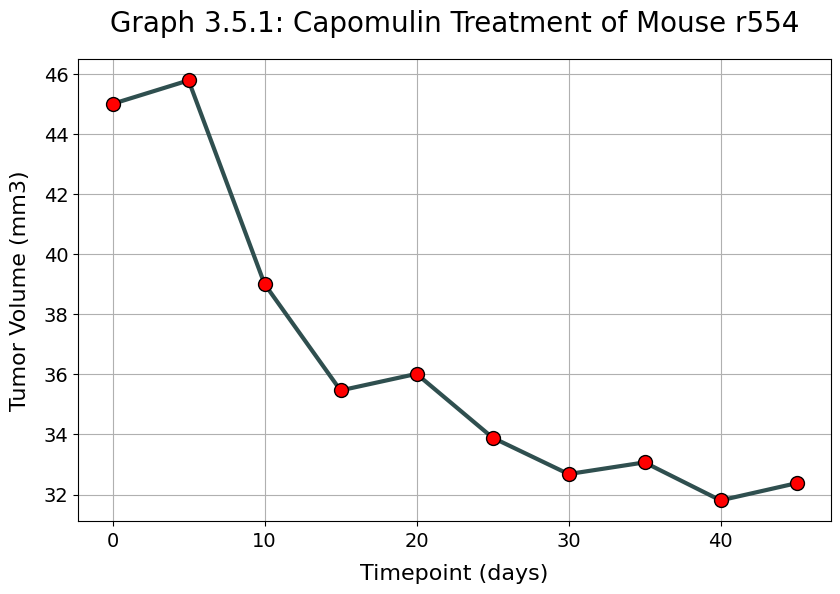

In [73]:
matplotlibx.display_line_chart_from_xy_series \
    (capomulin_x_series, capomulin_y_series,
     f'Graph 3.5.1: Capomulin Treatment of Mouse {rmid_capomulin_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Ceftamin)**

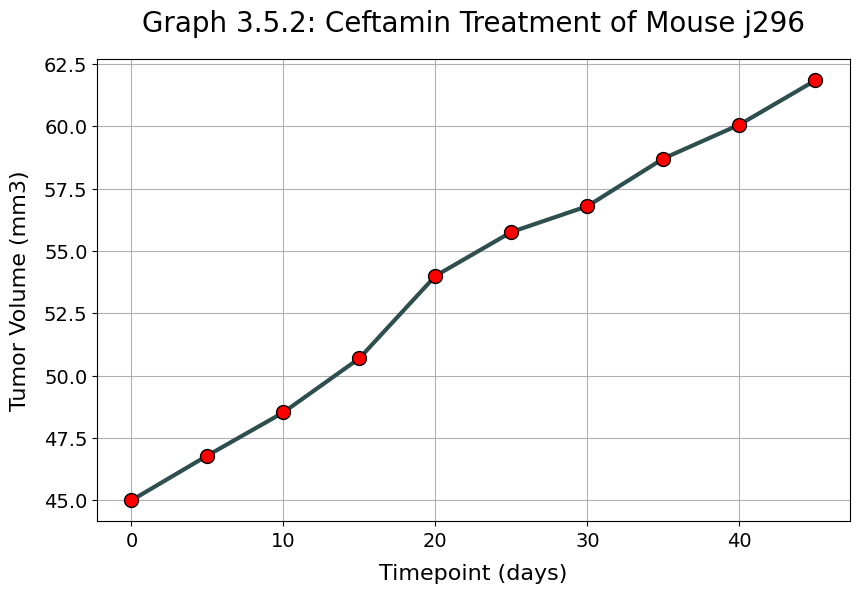

In [74]:
matplotlibx.display_line_chart_from_xy_series \
    (ceftamin_x_series, ceftamin_y_series,
     f'Graph 3.5.2: Ceftamin Treatment of Mouse {rmid_ceftamin_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Infubinol)**

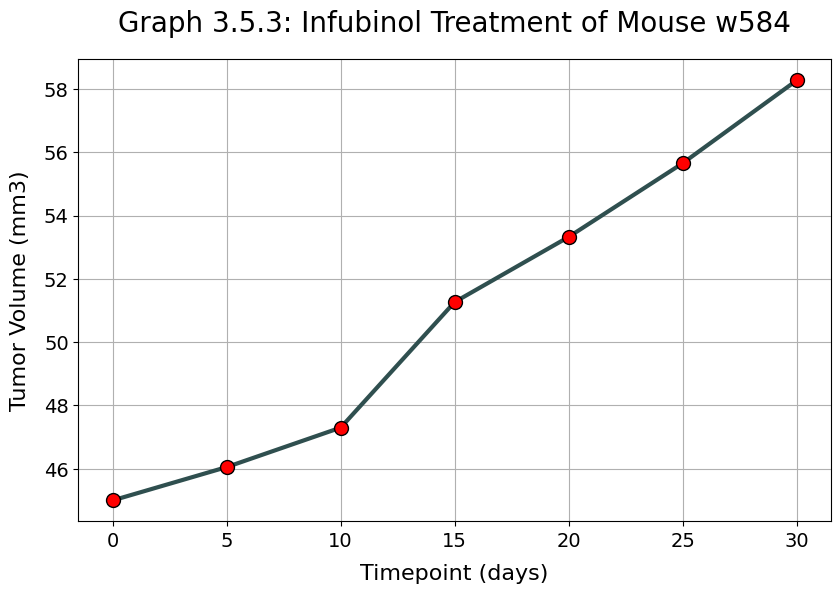

In [75]:
matplotlibx.display_line_chart_from_xy_series \
    (infubinol_x_series, infubinol_y_series,
     f'Graph 3.5.3: Infubinol Treatment of Mouse {rmid_infubinol_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Ketapril)**

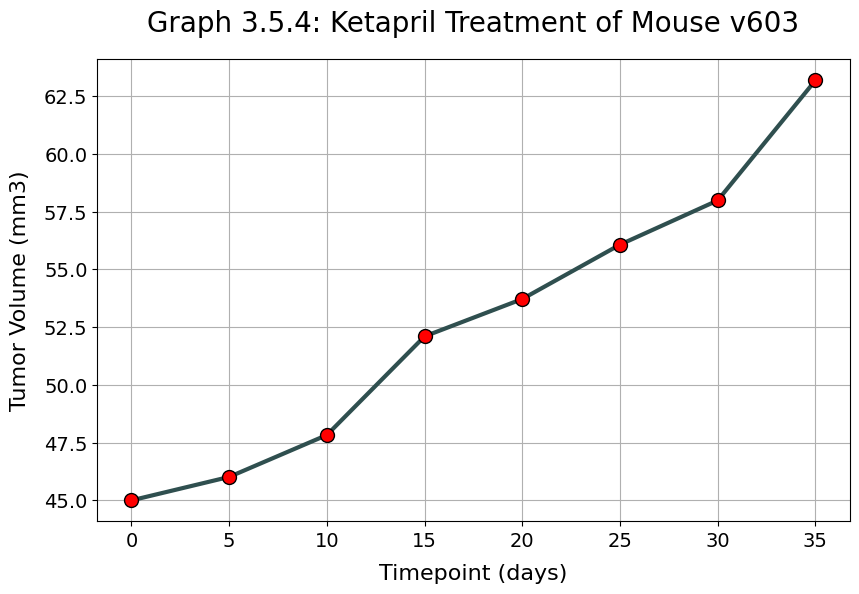

In [76]:
matplotlibx.display_line_chart_from_xy_series \
    (ketapril_x_series, ketapril_y_series,
     f'Graph 3.5.4: Ketapril Treatment of Mouse {rmid_ketapril_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Naftisol)**

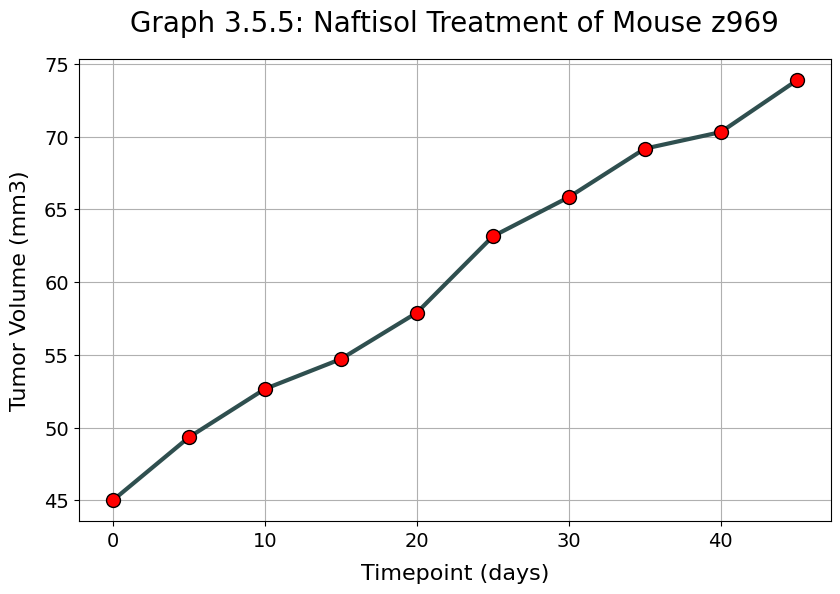

In [77]:
matplotlibx.display_line_chart_from_xy_series \
    (naftisol_x_series, naftisol_y_series,
     f'Graph 3.5.5: Naftisol Treatment of Mouse {rmid_naftisol_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Placebo)**

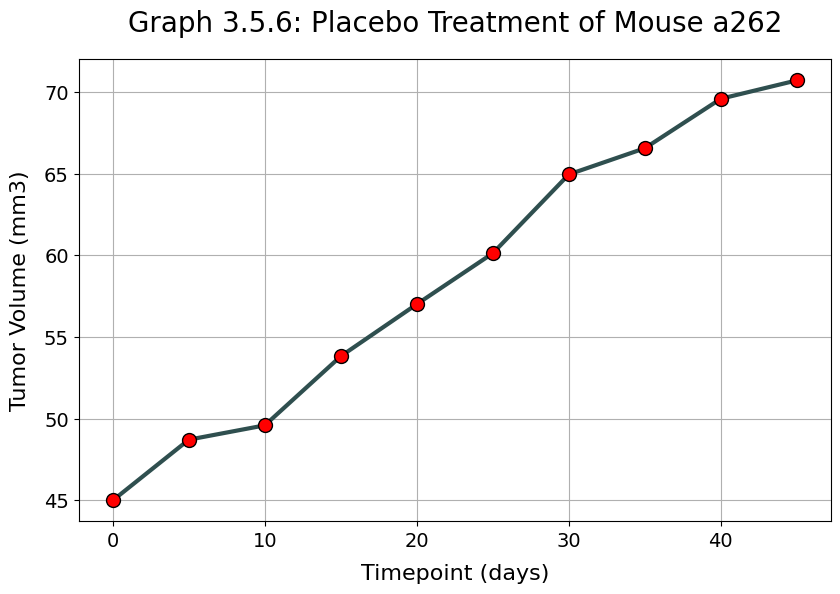

In [78]:
matplotlibx.display_line_chart_from_xy_series \
    (placebo_x_series, placebo_y_series,
     f'Graph 3.5.6: Placebo Treatment of Mouse {rmid_placebo_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Propriva)**

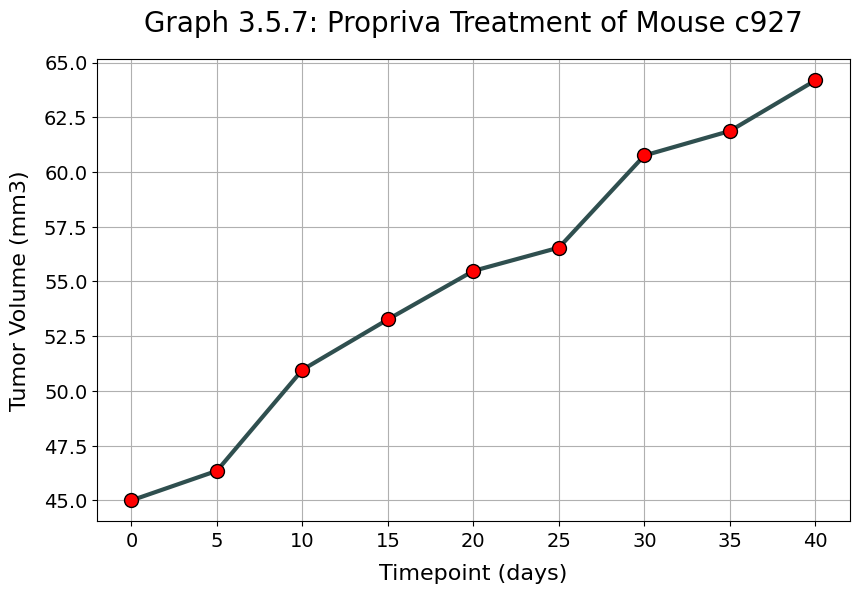

In [79]:
matplotlibx.display_line_chart_from_xy_series \
    (propriva_x_series, propriva_y_series,
     f'Graph 3.5.7: Propriva Treatment of Mouse {rmid_propriva_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Ramicane)**

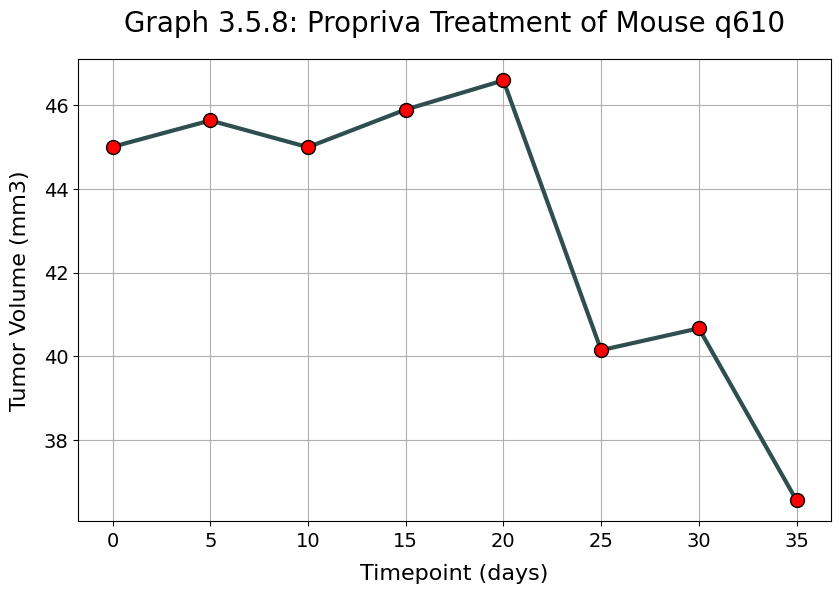

In [80]:
matplotlibx.display_line_chart_from_xy_series \
    (ramicane_x_series, ramicane_y_series,
     f'Graph 3.5.8: Propriva Treatment of Mouse {rmid_ramicane_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Stelasyn)**

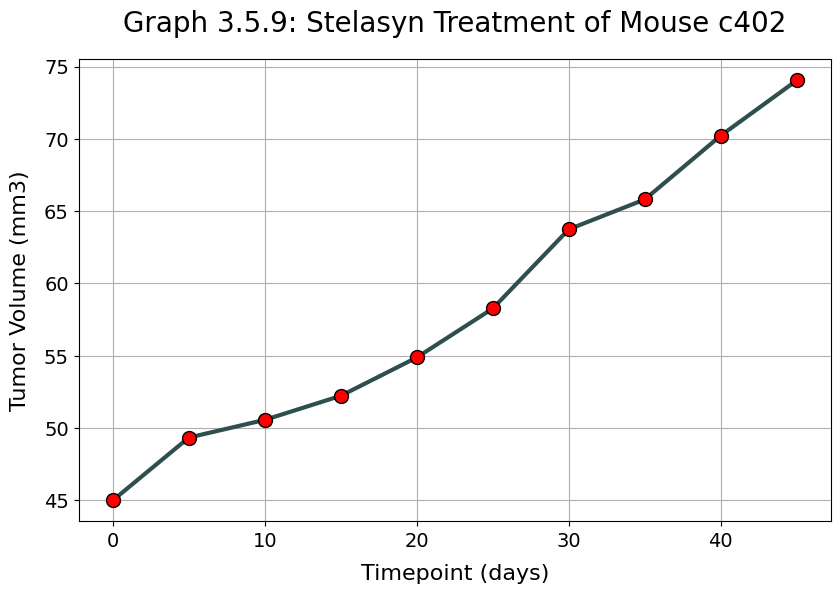

In [81]:
matplotlibx.display_line_chart_from_xy_series \
    (stelasyn_x_series, stelasyn_y_series,
     f'Graph 3.5.9: Stelasyn Treatment of Mouse {rmid_stelasyn_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

### **Display Line Plot (Zoniferol)**

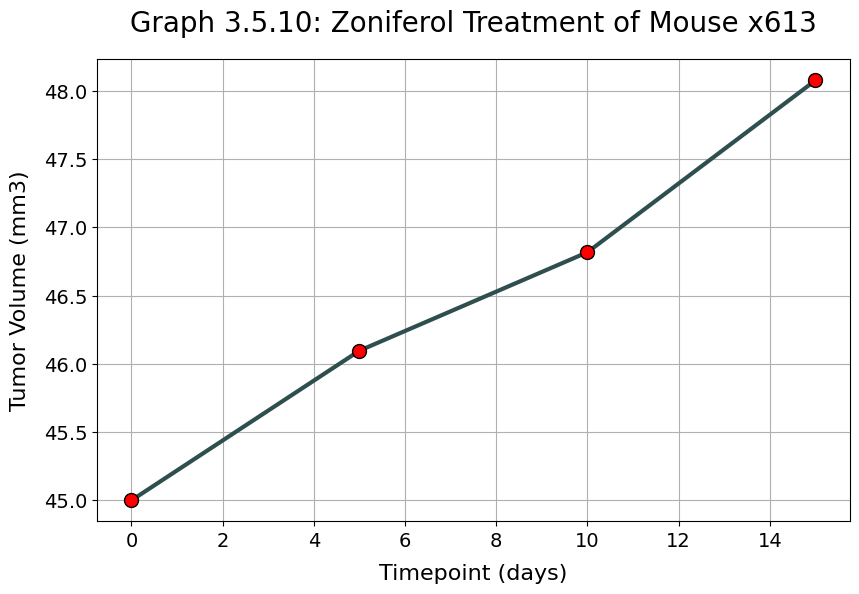

In [82]:
matplotlibx.display_line_chart_from_xy_series \
    (zoniferol_x_series, zoniferol_y_series,
     f'Graph 3.5.10: Zoniferol Treatment of Mouse {rmid_zoniferol_string}',
     'Timepoint (days)', 'Tumor Volume (mm3)')

# <br> **Section 4: Last Tumor Volume by Drug Regimen Statistics**

## **Section 4.1: Calculations**

### **Most Promising Drug Treatment Regimens**

In [83]:
# This line of code takes only rows for the four most promising treatment 
# regimens and the placebo and assigns the data to a DataFrame.
promising_treatment_dataframe \
    = clean_medical_study_dataframe \
        .loc \
            [(clean_medical_study_dataframe['drug_regimen'] == 'CAPOMULIN')|
             (clean_medical_study_dataframe['drug_regimen'] == 'RAMICANE')|
             (clean_medical_study_dataframe['drug_regimen'] == 'INFUBINOL')|
             (clean_medical_study_dataframe['drug_regimen'] == 'CEFTAMIN')|
             (clean_medical_study_dataframe['drug_regimen'] == 'PLACEBO'), :]

logx.log_write_object(promising_treatment_dataframe)

### **The Last (Greatest) Timepoint for Each Mouse (All)**

In [84]:
# This line of code uses groupby to group the rows by the last (greatest) timepoint 
# for each mouse ID, retrieves the maximum timepoint for each mouse, and resets 
# the dataframe's index.
maximum_timepoint_dataframe \
    = clean_medical_study_dataframe \
        .groupby('mouse_id')['timepoint'] \
            .max() \
            .reset_index()

logx.log_write_object(maximum_timepoint_dataframe)

### **New Merged DataFrame with Last Timepoints (All)**

In [85]:
merged_medical_study_dataframe \
    = pd.merge \
        (maximum_timepoint_dataframe,
         clean_medical_study_dataframe, 
         on = ['mouse_id', 'timepoint'],
         how = 'left')

logx.log_write_object(merged_medical_study_dataframe)

In [86]:
# In debug mode, these lines of code check if the mouse IDs in the merged
# medical study dataframe are the same as those in the maximum timepoint 
# per mouse dataframe.
if logx.LOG_FLAG == True:
    
    unique_id_nparray = merged_medical_study_dataframe['mouse_id'].unique()
    
    unique_id_max_timepoint_nparray = maximum_timepoint_dataframe['mouse_id'].unique()
    
    logx.print_and_log_text \
        (str(np.array_equal(unique_id_nparray, unique_id_max_timepoint_nparray)))

### **Drug Regimen List (All)**

In [87]:
all_regimens_string_list \
    = clean_medical_study_dataframe['drug_regimen'] \
         .sort_values(ascending = True) \
         .unique() \
         .tolist()

logx.log_write_object(all_regimens_string_list)

### **Populate Tumor Volume List (All)**

In [88]:
# This for loop cycles through the List of drug regimens, extracts the 
# tumor volume for each regimen as a Series, and appends the series to 
# a List.
tumor_volume_series_list = []

for regimen in all_regimens_string_list:

    regimen_dataframe \
        = merged_medical_study_dataframe \
            .loc[(merged_medical_study_dataframe['drug_regimen'] == regimen), :]

    tumor_volume_series_list.append(regimen_dataframe['tumor_volume_mm3'])

logx.log_write_object(tumor_volume_series_list)

## **Section 4.2: Display Tumor Volume Statistics**

### **Display Tumor Volume Statistics (All)**

In [89]:
display_tumor_volume_statistics \
    (tumor_volume_series_list, all_regimens_string_list, 
     '4.2', 'Tumor Volume')

lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
32.38,40.16,7.78,38.13,20.70,51.83,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
48.72,64.30,15.58,59.85,25.36,87.67,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
54.05,65.53,11.48,60.17,36.83,82.74,1


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
56.72,69.87,13.15,64.49,36.99,89.60,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
52.08,69.56,17.48,63.28,25.85,95.79,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
52.94,68.13,15.19,62.03,30.16,90.92,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
49.12,62.69,13.57,55.59,28.77,83.04,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
31.56,40.66,9.10,36.56,17.91,54.31,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
52.48,69.10,16.63,62.19,27.54,94.04,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
49.99,66.79,16.81,61.84,24.78,92.00,0


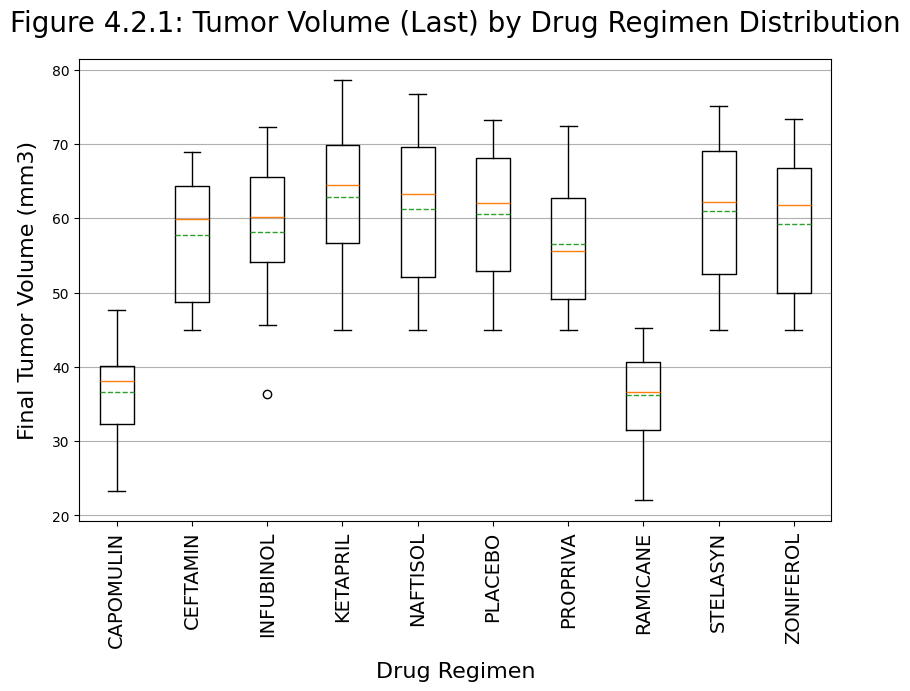

In [90]:
matplotlibx.display_boxplots_from_series_list \
    (tumor_volume_series_list,
     all_regimens_string_list,
     'Figure 4.2.1: Tumor Volume (Last) by Drug Regimen Distribution',
     'Drug Regimen', 'Final Tumor Volume (mm3)',
     xticks_rotation_float = 90.0)

# <br> **Section 5: Last (Greatest) Timepoint  Statistics**

## **Section 5.1: Populate Last Timepoint List**

In [91]:
last_timepoint_series_list = []

for regimen in all_regimens_string_list:

    regimen_dataframe \
        = merged_medical_study_dataframe \
            .loc[(merged_medical_study_dataframe['drug_regimen'] == regimen), :]

    last_timepoint_series_list.append(regimen_dataframe['timepoint'])

logx.log_write_object(last_timepoint_series_list)

## **Section 5.2: Display Last (Greatest) Timepoint  Statistics**

In [92]:
display_tumor_volume_statistics \
    (last_timepoint_series_list,
     all_regimens_string_list, 
     '5.2', 'Last (Greatest) Timepoint')

lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
45.00,45.00,0.00,45.00,45.00,45.00,4


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
15.00,45.00,30.00,45.00,-30.00,90.00,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
20.00,45.00,25.00,30.00,-17.50,82.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
25.00,45.00,20.00,40.00,-5.00,75.00,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
20.00,45.00,25.00,45.00,-17.50,82.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
20.00,45.00,25.00,35.00,-17.50,82.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
10.00,45.00,35.00,27.50,-42.50,97.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
45.00,45.00,0.00,45.00,45.00,45.00,5


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
23.75,45.00,21.25,37.50,-8.12,76.88,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
15.00,45.00,30.00,45.00,-30.00,90.00,0


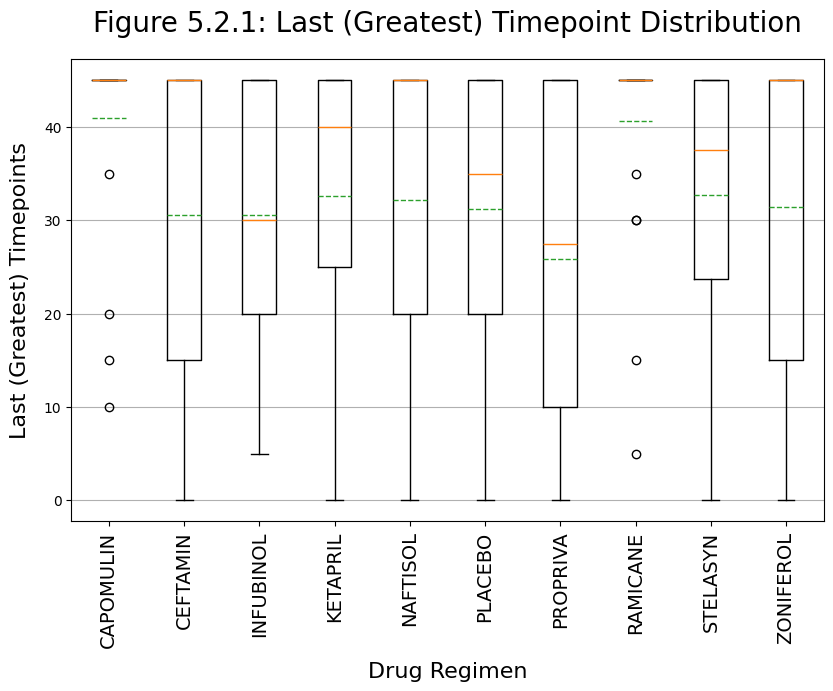

In [93]:
matplotlibx.display_boxplots_from_series_list \
    (last_timepoint_series_list,
     all_regimens_string_list,
     'Figure 5.2.1: Last (Greatest) Timepoint Distribution',
     'Drug Regimen', 'Last (Greatest) Timepoints',
     xticks_rotation_float = 90.0)

# <br> **Section 6: Data Points Per Mouse Analysis**

## **Section 6.1: Mouse Data Points by Drug Regimen**

### **Calculate Number of Observed Observatons**

In [94]:
regimen_count_series = clean_medical_study_dataframe['drug_regimen'].value_counts()

logx.log_write_object(regimen_count_series)

### **Display Observed Mouse Timepoints by Drug Regimen**

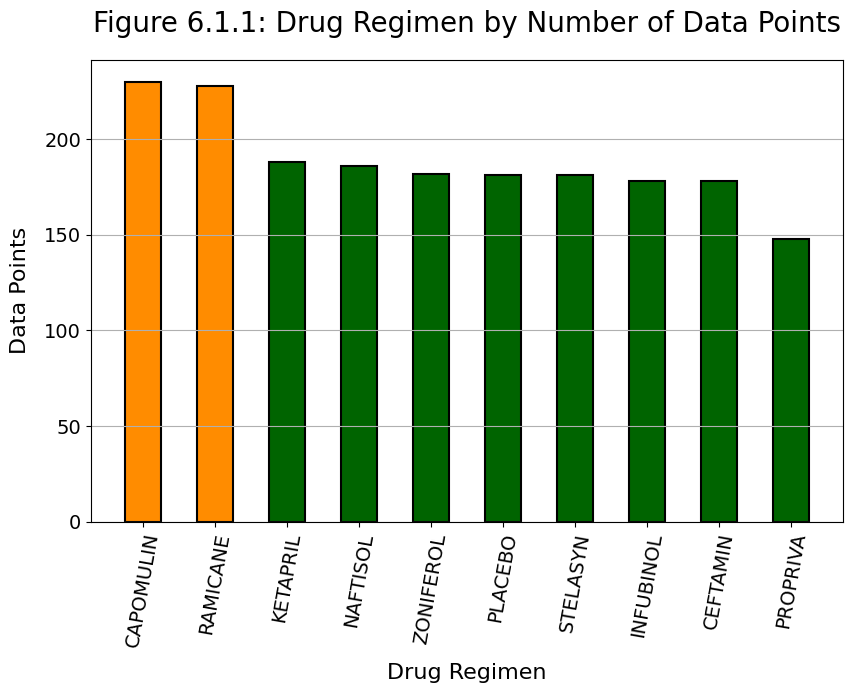

In [95]:
bar_colors_string_list \
    = ['darkorange',
       'darkorange', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen']

matplotlibx.display_bar_chart_from_series \
    (regimen_count_series,
     'Figure 6.1.1: Drug Regimen by Number of Data Points',
     'Drug Regimen', 'Data Points',
     bar_colors_string_list)

## **Section 6.2: Infubinol Statistical Outlier**

### **Display Infubinol Statistical Outlier**

In [96]:
infubinol_outlier_dataframe \
    = merged_medical_study_dataframe \
        .loc[(merged_medical_study_dataframe['drug_regimen'] == 'INFUBINOL') \
             & (merged_medical_study_dataframe['tumor_volume_mm3'] < 40.0), :]

logx.log_write_object(infubinol_outlier_dataframe)

In [97]:
pandasx.return_formatted_table \
    (infubinol_outlier_dataframe, 'Table 6.2.1: Infubinol Statistical Outlier')

mouse_id,timepoint,drug_regimen,sex,age_months,weight_grams,tumor_volume_mm3,metastatic_sites
c326,5,INFUBINOL,Female,18,25.00,36.32,0


### **Display Statistical Outlier Mouse Records**

In [98]:
infubinol_outlier_mouse_dataframe \
    = clean_medical_study_dataframe.loc[clean_medical_study_dataframe['mouse_id'] == 'c326', :]

logx.log_write_object(infubinol_outlier_mouse_dataframe)

In [99]:
pandasx.return_formatted_table \
    (infubinol_outlier_mouse_dataframe, 'Table 6.2.2: Statistical Outlier Mouse Records')

mouse_id,drug_regimen,sex,age_months,weight_grams,timepoint,tumor_volume_mm3,metastatic_sites
c326,INFUBINOL,Female,18,25.00,0,45.00,0
c326,INFUBINOL,Female,18,25.00,5,36.32,0


## **Section 6.3: Range of Data Points per Mouse**

### **Calculation**

In [100]:
minimum_data_points_per_mouse_integer \
    = clean_medical_study_dataframe.groupby('mouse_id')['drug_regimen'].count().min()

maximum_data_points_per_mouse_integer \
    = clean_medical_study_dataframe.groupby('mouse_id')['drug_regimen'].count().max()

### **Display Range of Data Points per Mouse**

In [101]:
logx.print_and_log_text \
    ('\033[1m' \
     + 'The range of data points per mouse is '
     + '{:,}'.format(minimum_data_points_per_mouse_integer)
     + '-{:,}.'.format(maximum_data_points_per_mouse_integer)
     + '\033[0m')

The range of data points per mouse is 1-10.


## **Section 6.4: Drug Treatment Regimen by Data Points Per Mouse**

### **Mouse ID by Number of Data Points**

In [102]:
mouse_id_by_data_points_series \
    = clean_medical_study_dataframe.groupby('mouse_id')['drug_regimen'].count()

logx.log_write_object(mouse_id_by_data_points_series)

In [103]:
mouse_id_by_data_points_dataframe = pd.DataFrame(mouse_id_by_data_points_series)

mouse_id_by_data_points_dataframe.rename \
    (columns = {'Drug Regimen': 'Data Points'},
     inplace = True)

logx.log_write_object(mouse_id_by_data_points_dataframe)

### **Display Mouse ID by Number of Data Points**

In [104]:
pandasx.return_formatted_table \
    (mouse_id_by_data_points_dataframe, 'Table 6.4.1: Mouse ID by Number of Data Points')

drug_regimen
10
10
10
10
7
10
10
10
3
10


### **Mouse ID Lists**

In [105]:
mouse_ids_1_to_3_string_list \
    = mouse_id_by_data_points_series \
        [(mouse_id_by_data_points_series >= 1) & (mouse_id_by_data_points_series <= 3)] \
            .index \
            .tolist()

logx.log_write_object(mouse_ids_1_to_3_string_list)

In [106]:
mouse_ids_4_to_6_string_list \
    = mouse_id_by_data_points_series \
        [(mouse_id_by_data_points_series >= 4) & (mouse_id_by_data_points_series <= 6)] \
            .index \
            .tolist()

logx.log_write_object(mouse_ids_4_to_6_string_list)

In [107]:
mouse_ids_7_to_9_string_list \
    = mouse_id_by_data_points_series \
        [(mouse_id_by_data_points_series >= 7) & (mouse_id_by_data_points_series <= 9)] \
            .index \
            .tolist()

logx.log_write_object(mouse_ids_7_to_9_string_list)

In [108]:
mouse_ids_10_string_list \
    = mouse_id_by_data_points_series \
        [mouse_id_by_data_points_series == 10] \
            .index \
            .tolist()

logx.log_write_object(mouse_ids_10_string_list)

### **Medical Study Information Based on Data Point Count per Mouse**

In [109]:
mouse_ids_1_to_3_medical_study_dataframe \
    = clean_medical_study_dataframe \
        .apply(lambda row: row[clean_medical_study_dataframe['mouse_id'].isin(mouse_ids_1_to_3_string_list)])

logx.log_write_object(mouse_ids_1_to_3_medical_study_dataframe)

In [110]:
mouse_ids_4_to_6_medical_study_dataframe \
    = clean_medical_study_dataframe \
        .apply(lambda row: row[clean_medical_study_dataframe['mouse_id'].isin(mouse_ids_4_to_6_string_list)])

logx.log_write_object(mouse_ids_4_to_6_medical_study_dataframe)

In [111]:
mouse_ids_7_to_9_medical_study_dataframe \
    = clean_medical_study_dataframe \
        .apply(lambda row: row[clean_medical_study_dataframe['mouse_id'].isin(mouse_ids_7_to_9_string_list)])

logx.log_write_object(mouse_ids_7_to_9_medical_study_dataframe)

In [112]:
mouse_ids_10_medical_study_dataframe \
    = clean_medical_study_dataframe \
        .apply(lambda row: row[clean_medical_study_dataframe['mouse_id'].isin(mouse_ids_10_string_list)])

logx.log_write_object(mouse_ids_10_medical_study_dataframe)

### **Mouse ID/Drug Regimen Information**

In [113]:
mouse_id_regimen_1_to_3_dataframe \
    = mouse_ids_1_to_3_medical_study_dataframe \
        .groupby(['mouse_id', 'drug_regimen']).size().reset_index()

logx.log_write_object(mouse_id_regimen_1_to_3_dataframe)

In [114]:
mouse_id_regimen_4_to_6_dataframe \
    = mouse_ids_4_to_6_medical_study_dataframe \
        .groupby(['mouse_id', 'drug_regimen']).size().reset_index()

logx.log_write_object(mouse_id_regimen_4_to_6_dataframe)

In [115]:
mouse_id_regimen_7_to_9_dataframe \
    = mouse_ids_7_to_9_medical_study_dataframe \
        .groupby(['mouse_id', 'drug_regimen']).size().reset_index()

logx.log_write_object(mouse_id_regimen_7_to_9_dataframe)

In [116]:
mouse_id_regimen_10_dataframe \
    = mouse_ids_10_medical_study_dataframe \
        .groupby(['mouse_id', 'drug_regimen']).size().reset_index()

logx.log_write_object(mouse_id_regimen_10_dataframe)

### **Number of Mice Vs. Drug Treatment Regimen**

In [117]:
mouse_1_to_3_vs_regimen_series \
    = mouse_id_regimen_1_to_3_dataframe.groupby('drug_regimen')['mouse_id'].count()

mouse_1_to_3_vs_regimen_series.name = '1-3 Data Points'

logx.log_write_object(mouse_1_to_3_vs_regimen_series)

In [118]:
mouse_4_to_6_vs_regimen_series \
    = mouse_id_regimen_4_to_6_dataframe.groupby('drug_regimen')['mouse_id'].count()

mouse_4_to_6_vs_regimen_series.name = '4-6 Data Points'

logx.log_write_object(mouse_4_to_6_vs_regimen_series)

In [119]:
mouse_7_to_9_vs_regimen_series \
    = mouse_id_regimen_7_to_9_dataframe.groupby('drug_regimen')['mouse_id'].count()

mouse_7_to_9_vs_regimen_series.name = '7-9 Data Points'

logx.log_write_object(mouse_7_to_9_vs_regimen_series)

In [120]:
mouse_10_vs_regimen_series \
    = mouse_id_regimen_10_dataframe.groupby('drug_regimen')['mouse_id'].count()

mouse_10_vs_regimen_series.name = '10 Data Points'

logx.log_write_object(mouse_10_vs_regimen_series)

### **Drug Treatment Regimen by Data Points Per Mouse**

In [121]:
mouse_count_vs_regimen_dataframe \
    = pd.concat \
        ([mouse_10_vs_regimen_series, 
          mouse_7_to_9_vs_regimen_series,
          mouse_4_to_6_vs_regimen_series,
          mouse_1_to_3_vs_regimen_series], 
         axis = 1)

logx.log_write_object(mouse_count_vs_regimen_dataframe)

### **Display Drug Treatment Regimen by Data Points Per Mouse**

In [122]:
pandasx \
    .return_formatted_table \
        (mouse_count_vs_regimen_dataframe,
         'Table 6.4.2: Drug Treatment Regimen by Data Point Category (Number of Mice)')

10 Data Points,7-9 Data Points,4-6 Data Points,1-3 Data Points
21,1,2,1
13,3,3,6
9,8,4,4
11,7,1,6
13,2,6,4
11,4,5,5
7,5,3,9
20,3,1,1
11,6,4,3
14,1,6,4


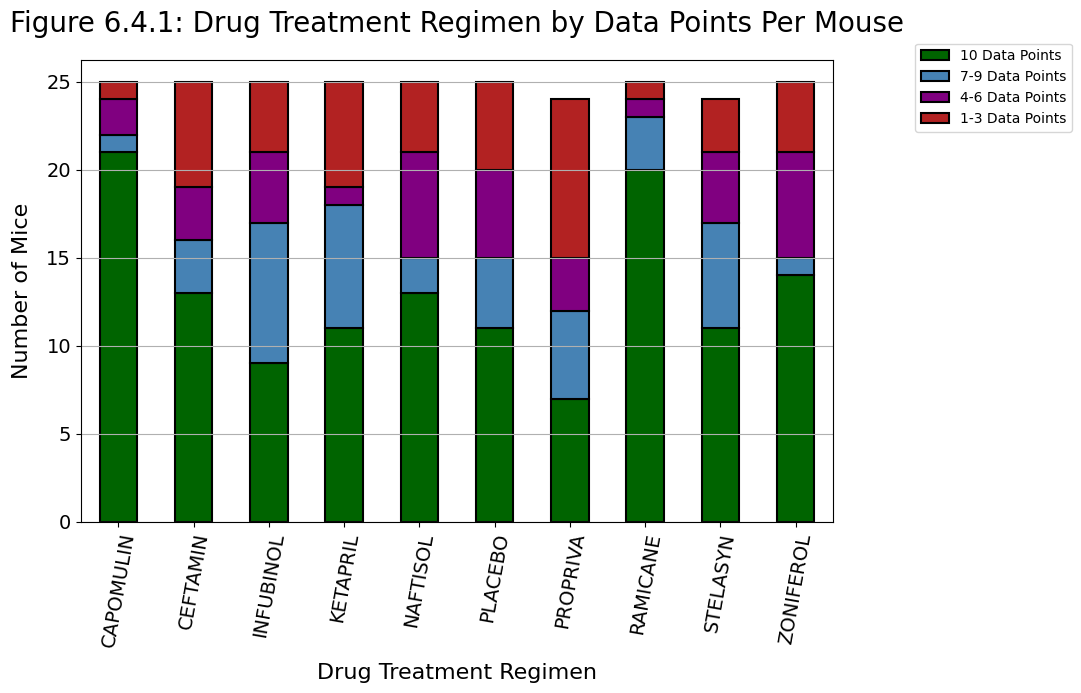

In [123]:
bar_colors_string_list = ['darkgreen', 'steelblue', 'purple', 'firebrick']

matplotlibx.display_bar_chart_from_dataframe \
    (mouse_count_vs_regimen_dataframe,
     'Figure 6.4.1: Drug Treatment Regimen by Data Points Per Mouse',
     'Drug Treatment Regimen', 'Number of Mice',
     bar_colors_string_list, True, True)

## **Section 6.5: Percentage of Missing Data Points**

### **Number of Expected Data Points**

In [124]:
regimen_count_integer = 10

expected_mice_per_regimen_integer = 25

expected_data_points_per_mouse_count_integer = 10

expected_data_point_total_integer \
    = regimen_count_integer \
        * expected_mice_per_regimen_integer \
        * expected_data_points_per_mouse_count_integer
    
logx.print_and_log_text \
    ('\033[1m' \
     + 'There should be {:,} '.format(expected_data_point_total_integer)
     + 'data points in this animal study.' \
     + '\033[0m')

There should be 2,500 data points in this animal study.


### **Number of Actual Data Points**

In [125]:
current_data_point_total_integer \
    = clean_medical_study_dataframe['mouse_id'].count()

logx.print_and_log_text \
    ('\033[1m' \
     + 'There are {:,} data points '.format(current_data_point_total_integer)
     + 'in this animal study.' \
     + '\033[0m')

There are 1,880 data points in this animal study.


### **Display Percentage of Missing Data Points**

In [126]:
missing_data_point_count_integer \
    = expected_data_point_total_integer - current_data_point_total_integer

missing_data_point_percentage_float \
    = (missing_data_point_count_integer / expected_data_point_total_integer) * 100

logx.print_and_log_text \
    ('\033[1m' \
     + 'This animal study is missing {:,} data points '.format(missing_data_point_count_integer)
     + 'or {:,.1f}% of the expected total.'.format(missing_data_point_percentage_float) \
     + '\033[0m')

This animal study is missing 620 data points or 24.8% of the expected total.


# **Section 7: Tumor Volumes vs. Mouse Weights by Drug Regimen**

## **Section 7.1: Tumor Volumes (Median) By Drug Regimen**

### **Tumor Volumes (Median) By Drug Regimen (Capomulin)**

In [127]:
capomulin_median_tumor_volume_per_mouse_series \
    = capomulin_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(capomulin_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Ceftamin)**

In [128]:
ceftamin_median_tumor_volume_per_mouse_series \
    = ceftamin_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(ceftamin_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Infubinol)**

In [129]:
infubinol_median_tumor_volume_per_mouse_series \
    = infubinol_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(infubinol_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Ketapril)**

In [130]:
ketapril_median_tumor_volume_per_mouse_series \
    = ketapril_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(ketapril_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Naftisol)**

In [131]:
naftisol_median_tumor_volume_per_mouse_series \
    = naftisol_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(naftisol_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Placebo)**

In [132]:
placebo_median_tumor_volume_per_mouse_series \
    = placebo_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(placebo_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Propriva)**

In [133]:
propriva_median_tumor_volume_per_mouse_series \
    = propriva_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(propriva_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Ramicane)**

In [134]:
ramicane_median_tumor_volume_per_mouse_series \
    = ramicane_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(ramicane_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Stelasyn)**

In [135]:
stelasyn_median_tumor_volume_per_mouse_series \
    = stelasyn_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(stelasyn_median_tumor_volume_per_mouse_series)

### **Tumor Volumes (Median) By Drug Regimen (Zoniferol)**

In [136]:
zoniferol_median_tumor_volume_per_mouse_series \
    = zoniferol_study_dataframe.groupby('mouse_id')['tumor_volume_mm3'].median()

logx.log_write_object(zoniferol_median_tumor_volume_per_mouse_series)

## **Section 7.2: Mouse Weights (Median) by Drug Regimen**

### **Mouse Weights (Median) by Drug Regimen (Capomulin)**

In [137]:
capomulin_median_weight_per_mouse_series \
    = capomulin_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(capomulin_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Ceftamin)**

In [138]:
ceftamin_median_weight_per_mouse_series \
    = ceftamin_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(ceftamin_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Infubinol)**

In [139]:
infubinol_median_weight_per_mouse_series \
    = infubinol_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(infubinol_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Ketapril)**

In [140]:
ketapril_median_weight_per_mouse_series \
    = ketapril_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(ketapril_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Naftisol)**

In [141]:
naftisol_median_weight_per_mouse_series \
    = naftisol_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(naftisol_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Placebo)**

In [142]:
placebo_median_weight_per_mouse_series \
    = placebo_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(placebo_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Propriva)**

In [143]:
propriva_median_weight_per_mouse_series \
    = propriva_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(propriva_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Ramicane)**

In [144]:
ramicane_median_weight_per_mouse_series \
    = ramicane_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(ramicane_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Stelasyn)**

In [145]:
stelasyn_median_weight_per_mouse_series \
    = stelasyn_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(stelasyn_median_weight_per_mouse_series)

### **Mouse Weights (Median) by Drug Regimen (Zoniferol)**

In [146]:
zoniferol_median_weight_per_mouse_series \
    = zoniferol_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(zoniferol_median_weight_per_mouse_series)

## **Section 7.3: Display Tumor Volumes vs. Mouse Weights With Regression**

### **Display Tumor Volumes vs. Mouse Weights With Regression (Capomulin)**

r-value:     0.7669
r-squared:   0.5881



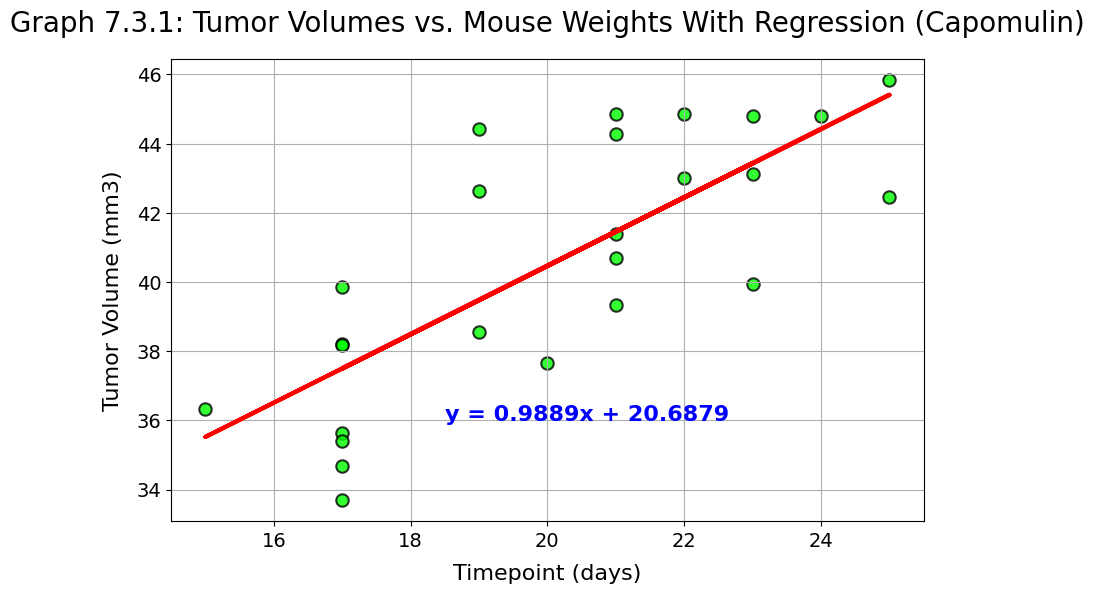

In [147]:
matplotlibx.display_scatter_plot_from_xy_series \
    (capomulin_median_weight_per_mouse_series,
     capomulin_median_tumor_volume_per_mouse_series,
     'Graph 7.3.1: Tumor Volumes vs. Mouse Weights With Regression (Capomulin)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 18.5, 36.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Ceftamin)**

r-value:     0.0081
r-squared:   0.0001



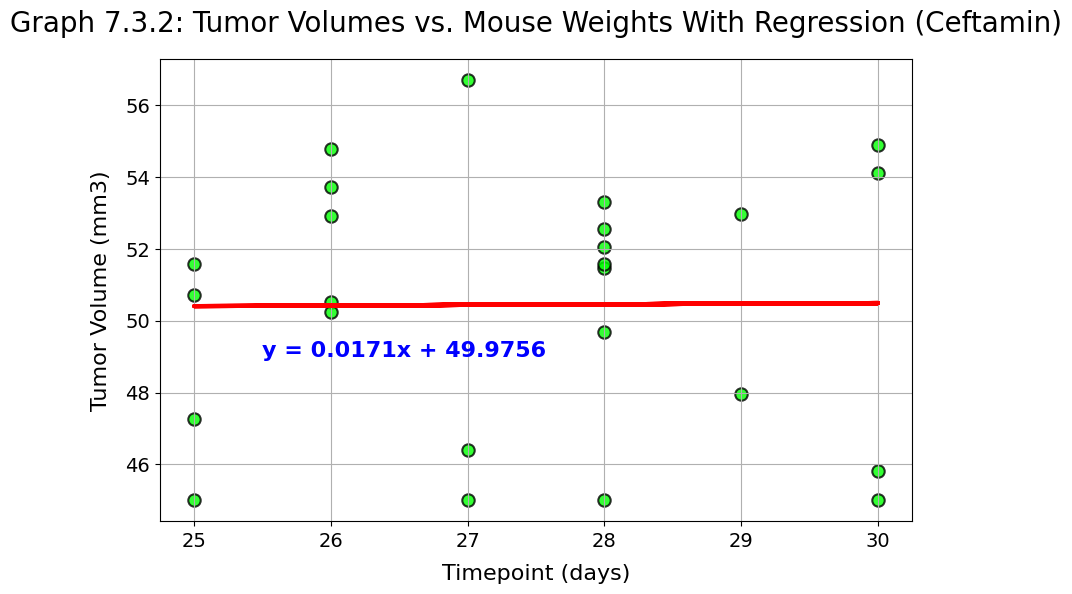

In [148]:
matplotlibx.display_scatter_plot_from_xy_series \
    (ceftamin_median_weight_per_mouse_series,
     ceftamin_median_tumor_volume_per_mouse_series,
     'Graph 7.3.2: Tumor Volumes vs. Mouse Weights With Regression (Ceftamin)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 49.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Infubinol)**

r-value:     -0.0681
r-squared:   0.0046



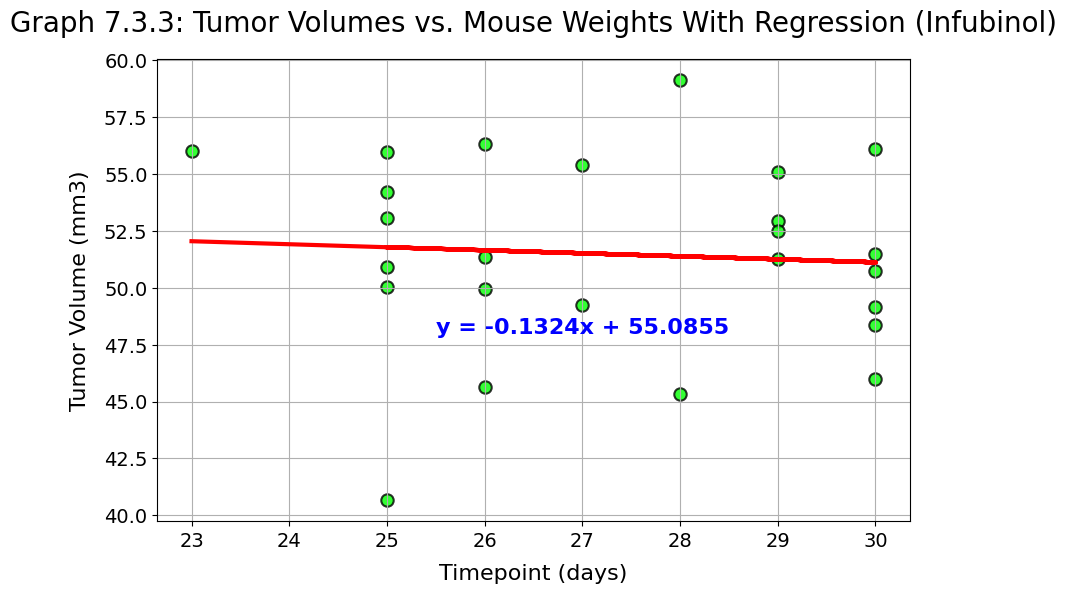

In [149]:
matplotlibx.display_scatter_plot_from_xy_series \
    (infubinol_median_weight_per_mouse_series,
     infubinol_median_tumor_volume_per_mouse_series,
     'Graph 7.3.3: Tumor Volumes vs. Mouse Weights With Regression (Infubinol)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 48.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Ketapril)**

r-value:     -0.0055
r-squared:   0.0000



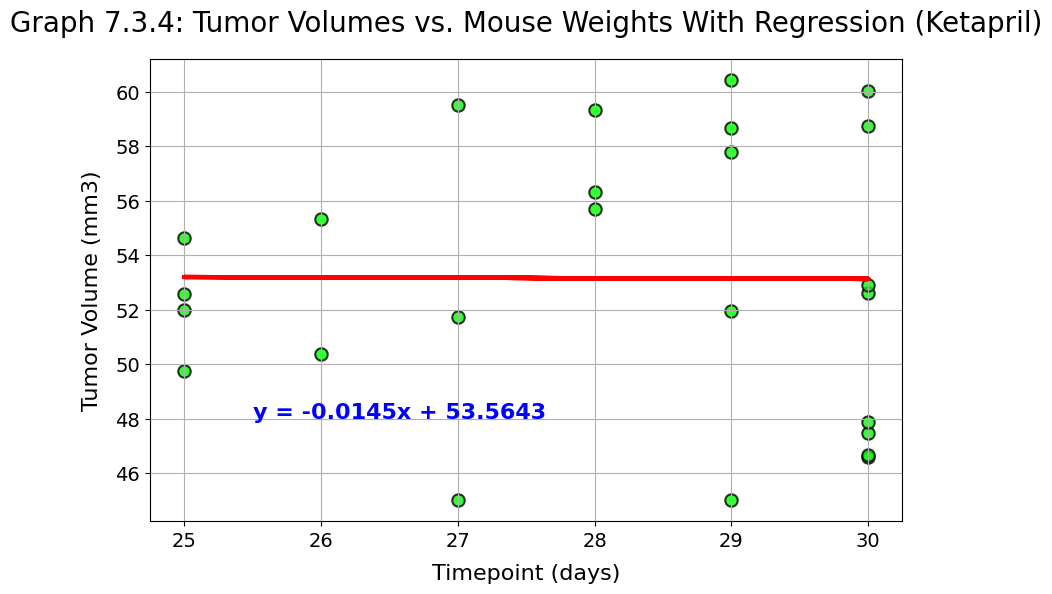

In [150]:
matplotlibx.display_scatter_plot_from_xy_series \
    (ketapril_median_weight_per_mouse_series,
     ketapril_median_tumor_volume_per_mouse_series,
     'Graph 7.3.4: Tumor Volumes vs. Mouse Weights With Regression (Ketapril)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 48.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Naftisol)**

r-value:     -0.1309
r-squared:   0.0171



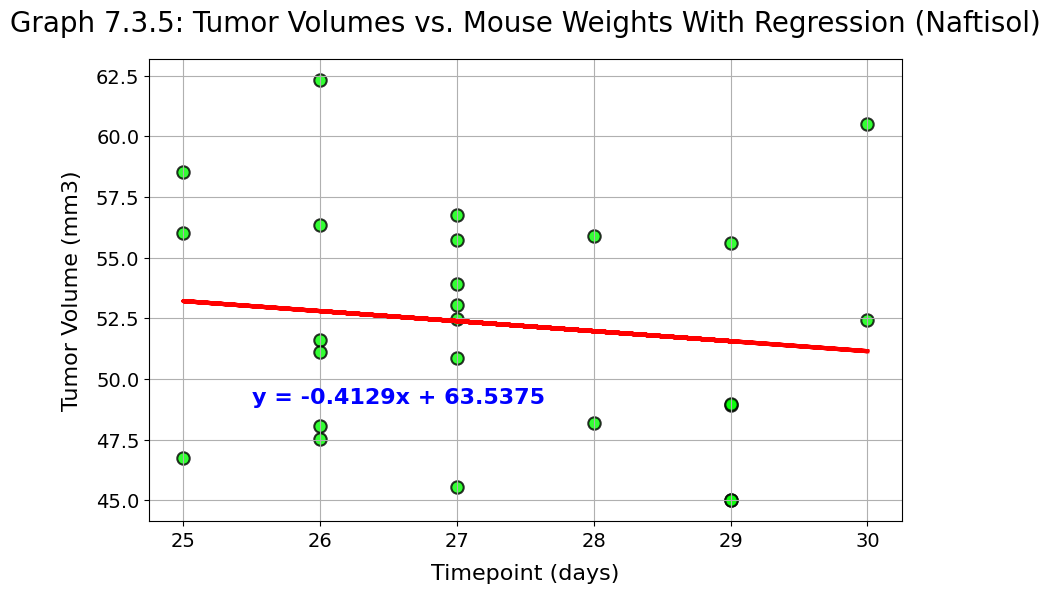

In [151]:
matplotlibx.display_scatter_plot_from_xy_series \
    (naftisol_median_weight_per_mouse_series,
     naftisol_median_tumor_volume_per_mouse_series,
     'Graph 7.3.5: Tumor Volumes vs. Mouse Weights With Regression (Naftisol)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 49.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Placebo)**

r-value:     -0.1195
r-squared:   0.0143



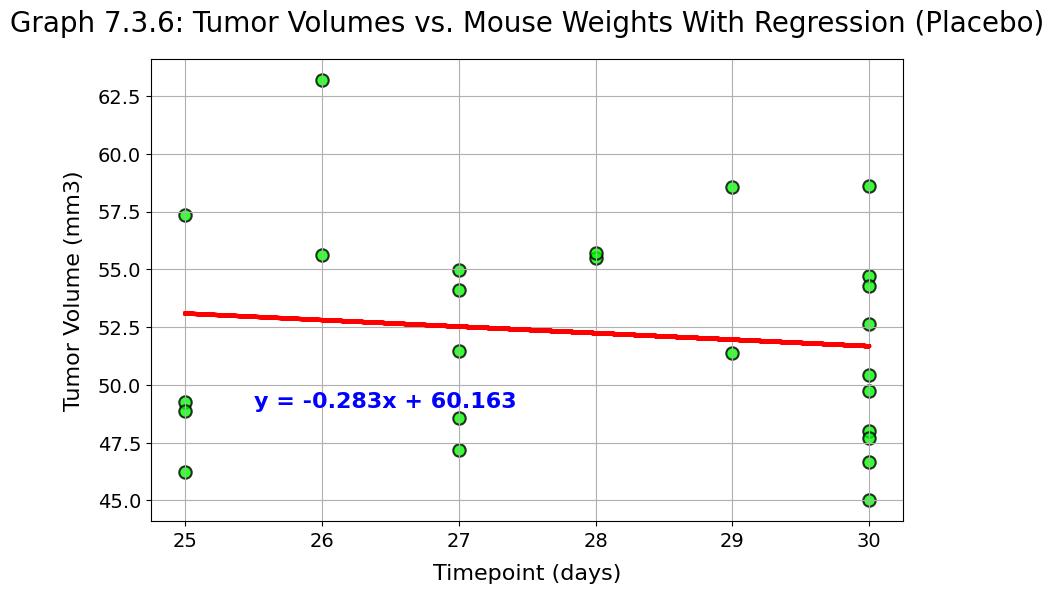

In [152]:
matplotlibx.display_scatter_plot_from_xy_series \
    (placebo_median_weight_per_mouse_series,
     placebo_median_tumor_volume_per_mouse_series,
     'Graph 7.3.6: Tumor Volumes vs. Mouse Weights With Regression (Placebo)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 49.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Propriva)**

r-value:     -0.0030
r-squared:   0.0000



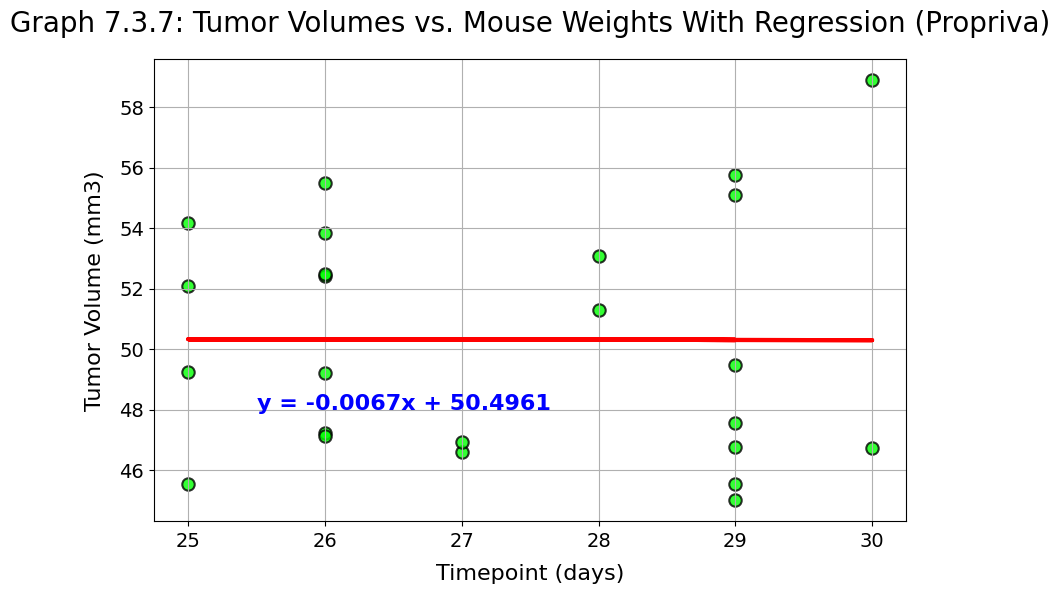

In [153]:
matplotlibx.display_scatter_plot_from_xy_series \
    (propriva_median_weight_per_mouse_series,
     propriva_median_tumor_volume_per_mouse_series,
     'Graph 7.3.7: Tumor Volumes vs. Mouse Weights With Regression (Propriva)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 48.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Ramicane)**

r-value:     0.6917
r-squared:   0.4784



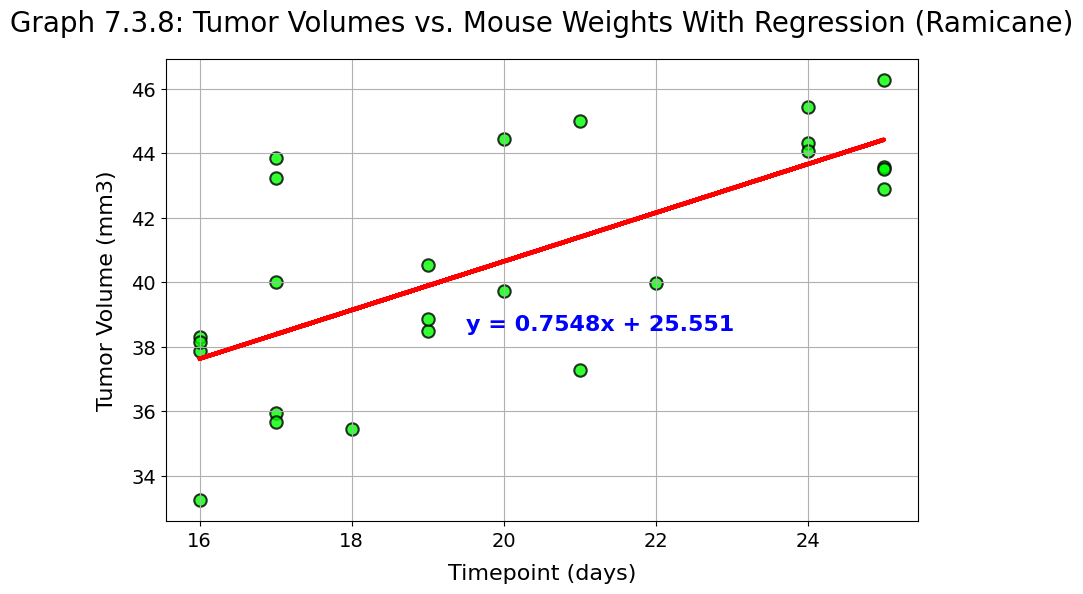

In [154]:
matplotlibx.display_scatter_plot_from_xy_series \
    (ramicane_median_weight_per_mouse_series,
     ramicane_median_tumor_volume_per_mouse_series,
     'Graph 7.3.8: Tumor Volumes vs. Mouse Weights With Regression (Ramicane)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 19.5, 38.5)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Stelasyn)**

r-value:     0.0623
r-squared:   0.0039



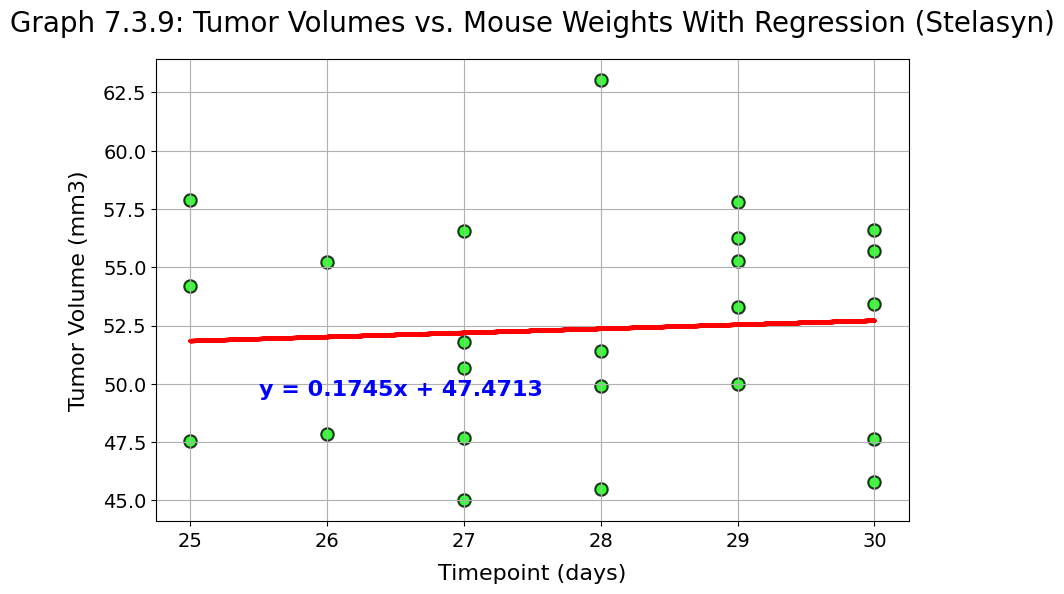

In [155]:
matplotlibx.display_scatter_plot_from_xy_series \
    (stelasyn_median_weight_per_mouse_series,
     stelasyn_median_tumor_volume_per_mouse_series,
     'Graph 7.3.9: Tumor Volumes vs. Mouse Weights With Regression (Stelasyn)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 49.5)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Zoniferol)**

r-value:     -0.3136
r-squared:   0.0983



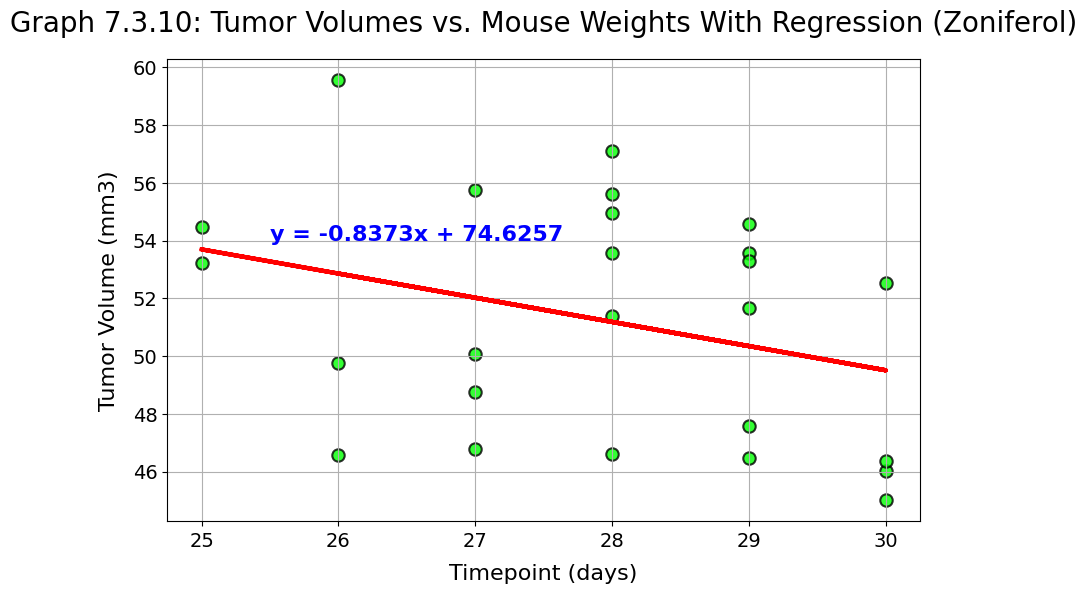

In [156]:
matplotlibx.display_scatter_plot_from_xy_series \
    (zoniferol_median_weight_per_mouse_series,
     zoniferol_median_tumor_volume_per_mouse_series,
     'Graph 7.3.10: Tumor Volumes vs. Mouse Weights With Regression (Zoniferol)',
     'Timepoint (days)', 'Tumor Volume (mm3)', 1, 25.5, 54.0)

### **Display Tumor Volumes vs. Mouse Weights Plots with High Correlation**

CAPOMULIN:
r-value:     0.7669
r-squared:   0.5881



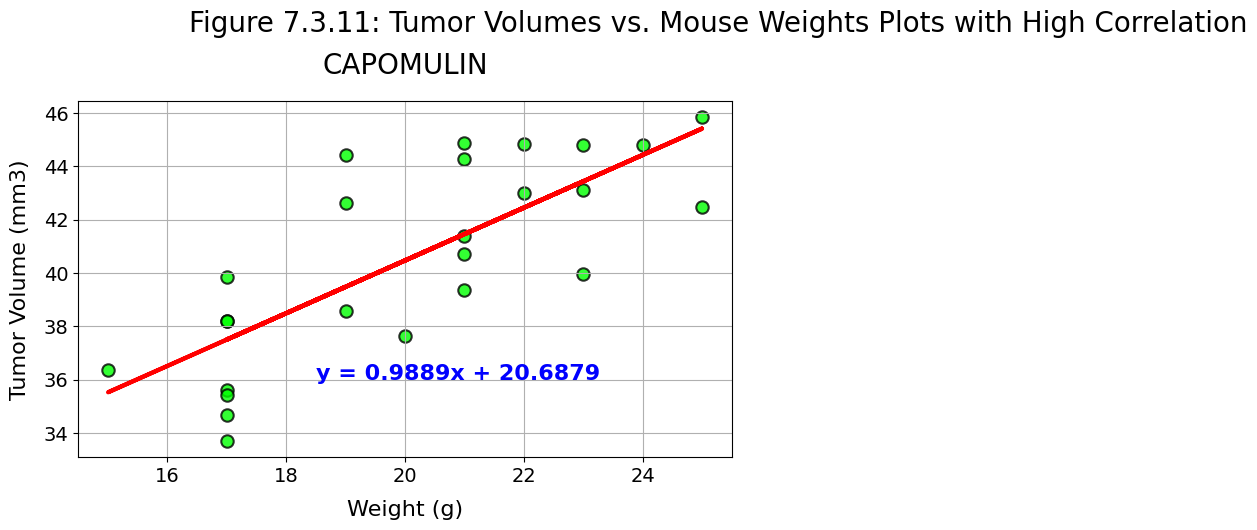

RAMICANE:
r-value:     0.6917
r-squared:   0.4784



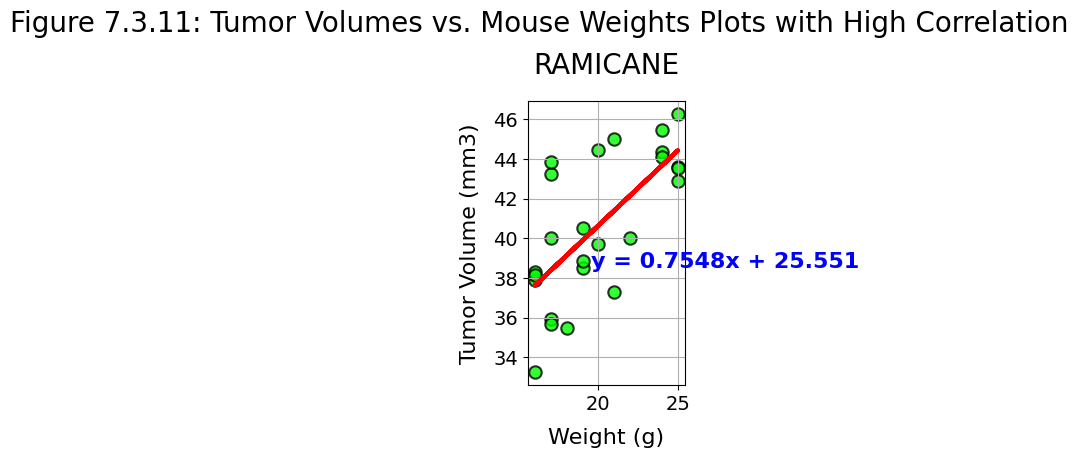

In [157]:
x_series_list = []
y_series_list = []

title_string_list = []

equation_x_coordinate_float_list = []
equation_y_coordinate_float_list = []


x_series_list.append(capomulin_median_weight_per_mouse_series)
x_series_list.append(ramicane_median_weight_per_mouse_series)

y_series_list.append(capomulin_median_tumor_volume_per_mouse_series)
y_series_list.append(ramicane_median_tumor_volume_per_mouse_series)

title_string_list.append('CAPOMULIN')
title_string_list.append('RAMICANE')

equation_x_coordinate_float_list.append(18.5)
equation_x_coordinate_float_list.append(19.5)

equation_y_coordinate_float_list.append(36.0)
equation_y_coordinate_float_list.append(38.5)

matplotlibx.display_multiple_scatter_plots_from_xy_series_list \
    (x_series_list, y_series_list, title_string_list,
     'Figure 7.3.11: Tumor Volumes vs. Mouse Weights Plots with High Correlation',
     'Weight (g)', 'Tumor Volume (mm3)', 1,
     equation_x_coordinate_float_list, equation_y_coordinate_float_list)

## **Section 7.4: Mouse Weight Statistics**

### **Median Mouse Weights DataFrame**

In [158]:
median_mouse_weights_by_id_series \
    = clean_medical_study_dataframe.groupby('mouse_id')['weight_grams'].median()

logx.log_write_object(median_mouse_weights_by_id_series)

In [159]:
drug_regimen_by_id_series \
    = clean_medical_study_dataframe.groupby('mouse_id')['drug_regimen'].unique()

for index, row in enumerate(drug_regimen_by_id_series):
    
    drug_regimen_by_id_series.iloc[index] = row[0]
    
logx.log_write_object(drug_regimen_by_id_series)

In [160]:
frame_dictionary \
    = {'drug_regimen': drug_regimen_by_id_series.tolist(),
       'weight_grams': median_mouse_weights_by_id_series}

median_mouse_weights_dataframe \
    = pd.DataFrame(frame_dictionary)

### **Display Mouse ID by Drug Regimen and Weight**

In [161]:
pandasx.return_formatted_table \
    (median_mouse_weights_dataframe, 'Table 7.4.0: Mouse ID by Drug Regimen and Weight')

drug_regimen,weight_grams
INFUBINOL,23.00
INFUBINOL,25.00
PLACEBO,29.00
CEFTAMIN,28.00
STELASYN,29.00
ZONIFEROL,25.00
RAMICANE,22.00
RAMICANE,25.00
KETAPRIL,30.00
STELASYN,25.00


### **Populate Median Mouse Weight List**

In [162]:
mouse_median_weights_series_list = []

for regimen in all_regimens_string_list:

    regimen_study_dataframe \
        = median_mouse_weights_dataframe \
            .loc[(median_mouse_weights_dataframe['drug_regimen'] == regimen), :]

    mouse_median_weights_series_list \
        .append(regimen_study_dataframe['weight_grams'])

logx.log_write_object(mouse_median_weights_series_list)

### **Display Mouse Weight Statistics**

In [163]:
display_tumor_volume_statistics \
    (mouse_median_weights_series_list,
     all_regimens_string_list, 
     '7.4', 'Mouse Weight')

lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
17.00,22.00,5.00,21.00,9.50,29.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
26.00,28.00,2.00,28.00,23.00,31.00,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
25.00,29.00,4.00,27.00,19.00,35.00,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
27.00,30.00,3.00,29.00,22.50,34.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
26.00,29.00,3.00,27.00,21.50,33.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
27.00,30.00,3.00,28.00,22.50,34.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
26.00,29.00,3.00,27.00,21.50,33.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
17.00,24.00,7.00,19.00,6.50,34.50,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
27.00,29.00,2.00,28.00,24.00,32.00,0


lower_quartile,upper_quartile,interquartile_range,median,lower_boundary,upper_boundary,outlier_count
27.00,29.00,2.00,28.00,24.00,32.00,0


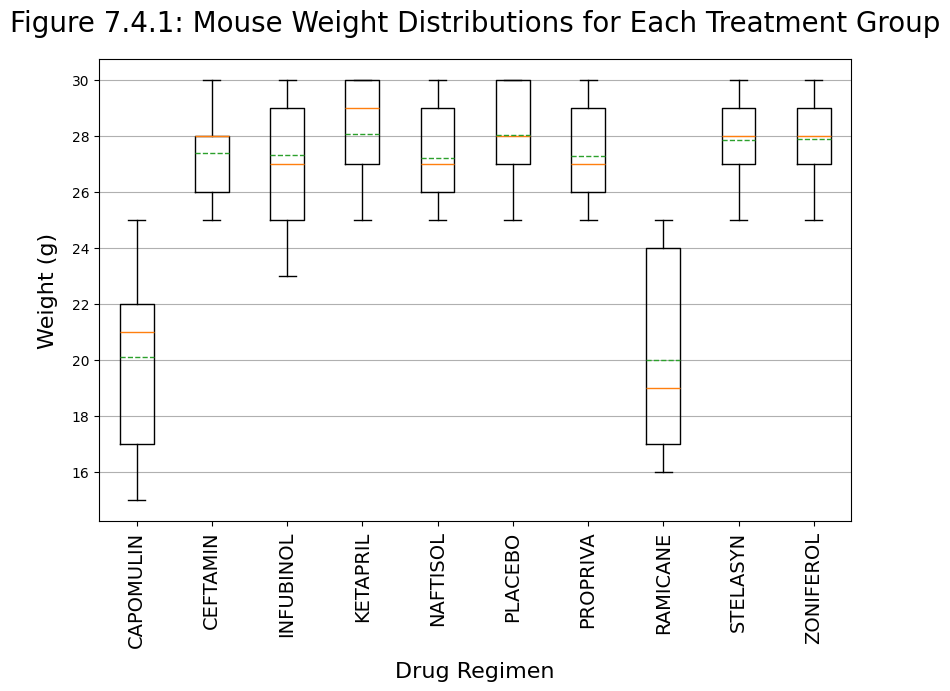

In [164]:
matplotlibx.display_boxplots_from_series_list \
    (mouse_median_weights_series_list,
     all_regimens_string_list,
     'Figure 7.4.1: Mouse Weight Distributions for Each Treatment Group',
     'Drug Regimen', 'Weight (g)',
     xticks_rotation_float = 90.0)

# <br> **Section 8: Male vs. Female Mouse Distribution**

## **Section 8.1: Mouse Count by Gender for Each Regimen**

### **Calculate Mouse Count by Gender (Capomulin)**

In [165]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'CAPOMULIN'), :]

capomulin_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Ceftamin)**

In [166]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'CEFTAMIN'), :]

ceftamin_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Infubinol)**

In [167]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'INFUBINOL'), :]

infubinol_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Ketapril)**

In [168]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'KETAPRIL'), :]

ketapril_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Naftisol)**

In [169]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'NAFTISOL'), :]

naftisol_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Placebo)**

In [170]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'PLACEBO'), :]

placebo_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Propriva)**

In [171]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'PROPRIVA'), :]

propriva_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Ramicane)**

In [172]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'RAMICANE'), :]

ramicane_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Stelasyn)**

In [173]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'STELASYN'), :]

stelasyn_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (Zoniferol)**

In [174]:
treatment_regimens_dataframe \
    = clean_medical_study_dataframe \
        .loc[(clean_medical_study_dataframe['drug_regimen'] == 'ZONIFEROL'), :]

zoniferol_mouse_count_by_gender_series \
    = treatment_regimens_dataframe['sex'].value_counts()

logx.log_write_object(treatment_regimens_dataframe)

### **Calculate Mouse Count by Gender (All)**

In [175]:
mouse_count_by_gender_series \
    = clean_medical_study_dataframe['sex'].value_counts()

logx.log_write_object(mouse_count_by_gender_series)

### **Gender Count Distribution DataFrame**

In [176]:
frame_dictionary \
    = {'capomulin': capomulin_mouse_count_by_gender_series,
       'ceftamin': ceftamin_mouse_count_by_gender_series,
       'infubinol': infubinol_mouse_count_by_gender_series,
       'ketapril': ketapril_mouse_count_by_gender_series,
       'naftisol': naftisol_mouse_count_by_gender_series,
       'placebo': placebo_mouse_count_by_gender_series,
       'propriva': propriva_mouse_count_by_gender_series,
       'ramicane': ramicane_mouse_count_by_gender_series,
       'stelasyn': stelasyn_mouse_count_by_gender_series,
       'zoniferol': zoniferol_mouse_count_by_gender_series}

mouse_gender_count_distribution_dataframe = pd.DataFrame(frame_dictionary)

### **Display Mouse Gender Count Distribution by Drug Regimen**

In [177]:
pandasx.return_formatted_table \
    (mouse_gender_count_distribution_dataframe,
     'Table 8.1.1: Mouse Gender Count Distribution by Drug Regimen', 10, False)

,capomulin,ceftamin,infubinol,ketapril,naftisol,placebo,propriva,ramicane,stelasyn,zoniferol
sex,,,,,,,,,,
Female,128,92,95,58,86,102,61,74,107,119
Male,102,86,83,130,100,79,87,154,74,63


### **Gender Percent Distribution DataFrame**

In [178]:
mouse_gender_percent_distribution_dataframe \
    = mouse_gender_count_distribution_dataframe \
        .apply(lambda x: x/sum(x)*100, axis = 0)

display_dataframe \
    = mouse_gender_percent_distribution_dataframe.copy()

temp_string_list = [x.lower() for x in all_regimens_string_list]

for regimen in temp_string_list:
    
    display_dataframe.loc[:, regimen] = display_dataframe[regimen]

### **Display Mouse Gender Percent Distribution by Drug Regimen**

In [179]:
pandasx.return_formatted_table \
    (display_dataframe, 'Table 8.1.2: Mouse Gender Percent Distribution by Drug Regimen', 10, False)

,capomulin,ceftamin,infubinol,ketapril,naftisol,placebo,propriva,ramicane,stelasyn,zoniferol
sex,,,,,,,,,,
Female,55.65,51.69,53.37,30.85,46.24,56.35,41.22,32.46,59.12,65.38
Male,44.35,48.31,46.63,69.15,53.76,43.65,58.78,67.54,40.88,34.62


## **Section 8.2: DisplayMale vs. Female Mouse Distribution**

### **Display Female vs. Male Distribution  (All)**

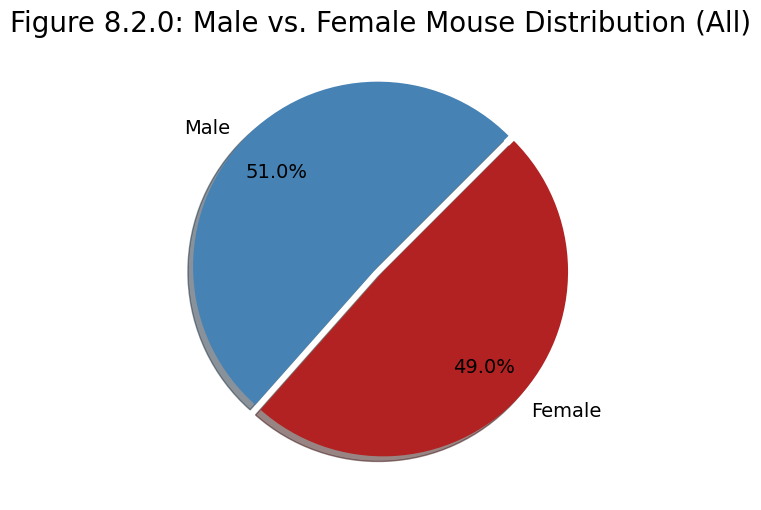

In [180]:
pie_colors_string_list = ['steelblue', 'firebrick']

explode_tuple = (0.02, 0.02)

matplotlibx.display_pie_chart_from_series \
    (mouse_count_by_gender_series,
     'Figure 8.2.0: Male vs. Female Mouse Distribution (All)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Capomulin)**

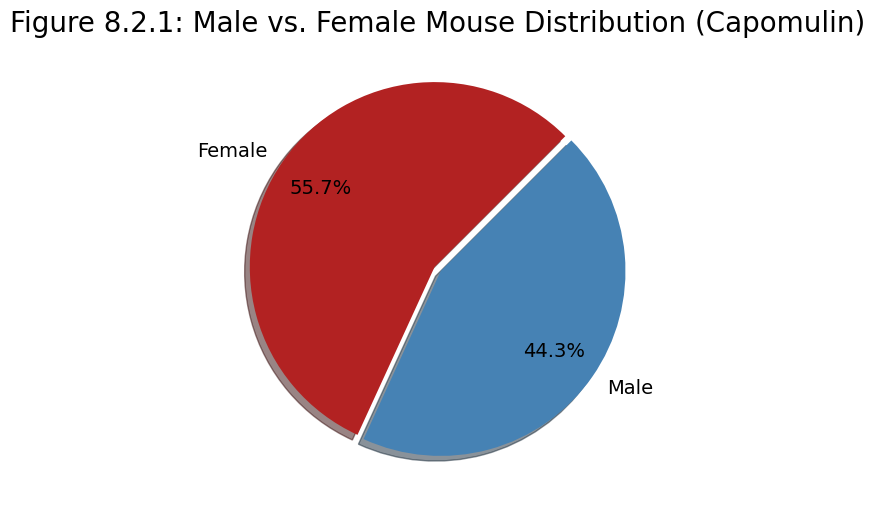

In [181]:
pie_colors_string_list = ['firebrick', 'steelblue']

explode_tuple = (0.02, 0.02)

matplotlibx.display_pie_chart_from_series \
    (capomulin_mouse_count_by_gender_series, 
     'Figure 8.2.1: Male vs. Female Mouse Distribution (Capomulin)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Ceftamin)**

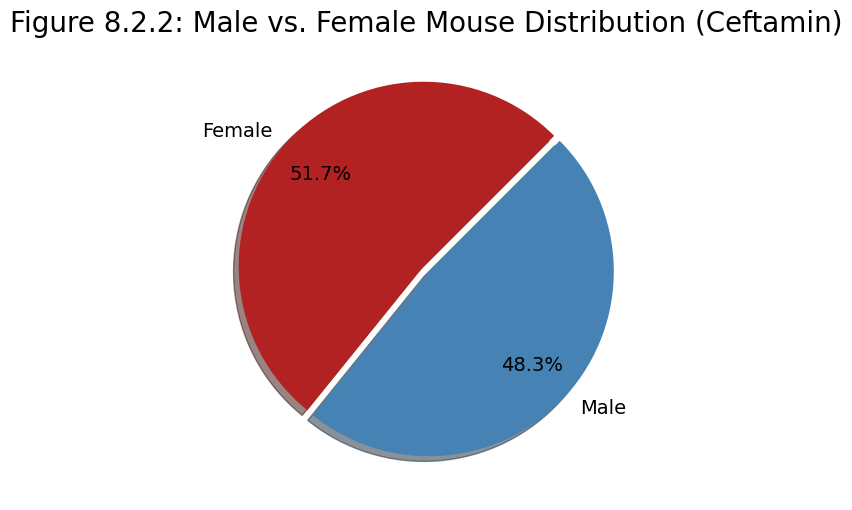

In [182]:
matplotlibx.display_pie_chart_from_series \
    (ceftamin_mouse_count_by_gender_series, 
     'Figure 8.2.2: Male vs. Female Mouse Distribution (Ceftamin)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Infubinol)**

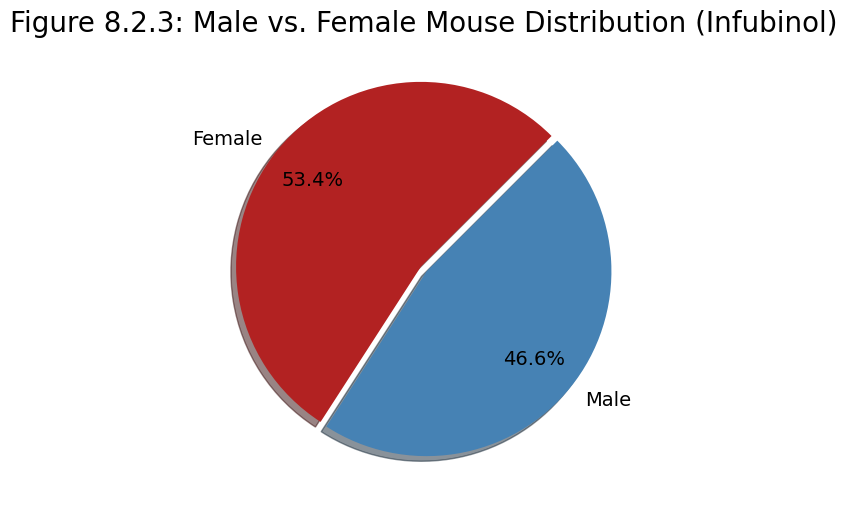

In [183]:
matplotlibx.display_pie_chart_from_series \
    (infubinol_mouse_count_by_gender_series, 
     'Figure 8.2.3: Male vs. Female Mouse Distribution (Infubinol)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Ketapril)**

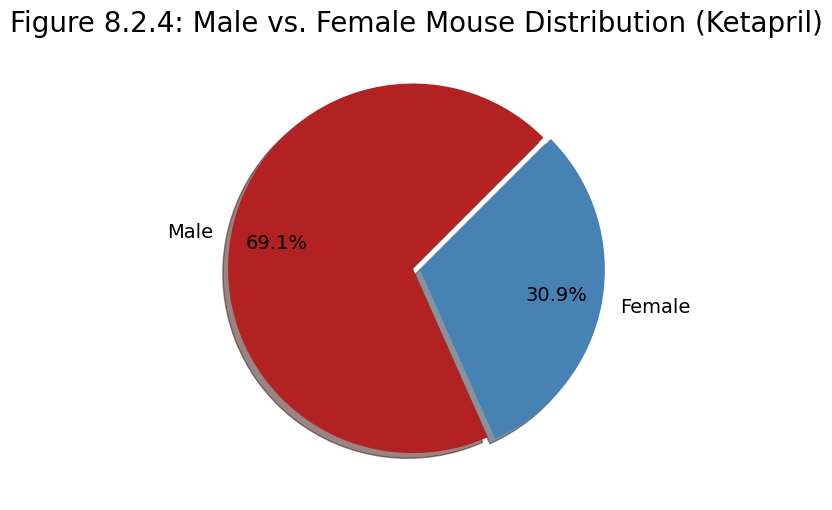

In [184]:
matplotlibx.display_pie_chart_from_series \
    (ketapril_mouse_count_by_gender_series, 
     'Figure 8.2.4: Male vs. Female Mouse Distribution (Ketapril)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Naftisol)**

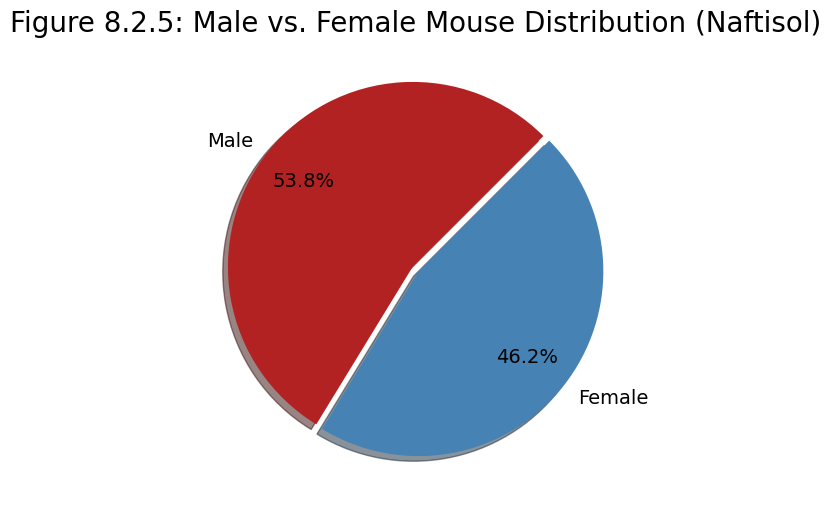

In [185]:
matplotlibx.display_pie_chart_from_series \
    (naftisol_mouse_count_by_gender_series, 
     'Figure 8.2.5: Male vs. Female Mouse Distribution (Naftisol)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Placebo)**

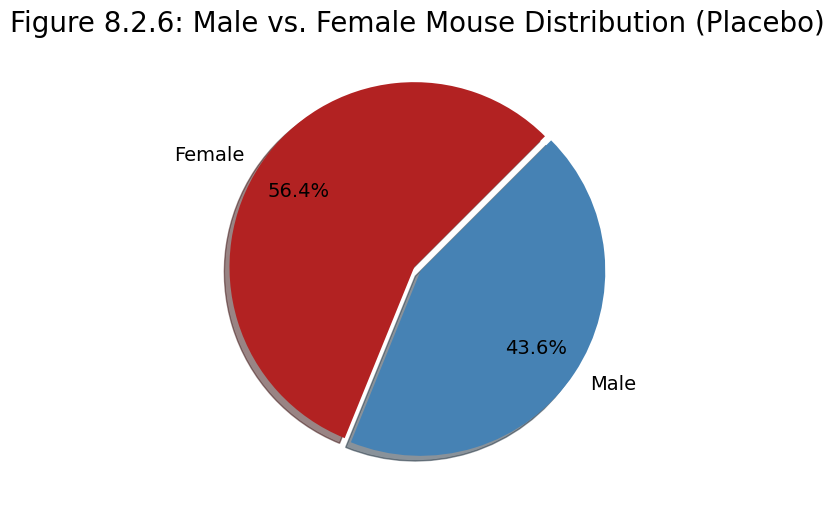

In [186]:
matplotlibx.display_pie_chart_from_series \
    (placebo_mouse_count_by_gender_series, 
     'Figure 8.2.6: Male vs. Female Mouse Distribution (Placebo)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Propriva)**

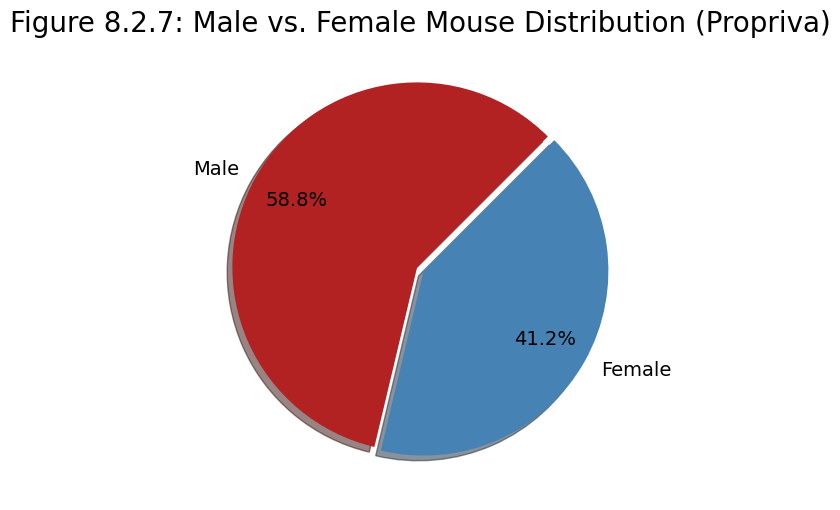

In [187]:
matplotlibx.display_pie_chart_from_series \
    (propriva_mouse_count_by_gender_series, 
     'Figure 8.2.7: Male vs. Female Mouse Distribution (Propriva)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Ramicane)**

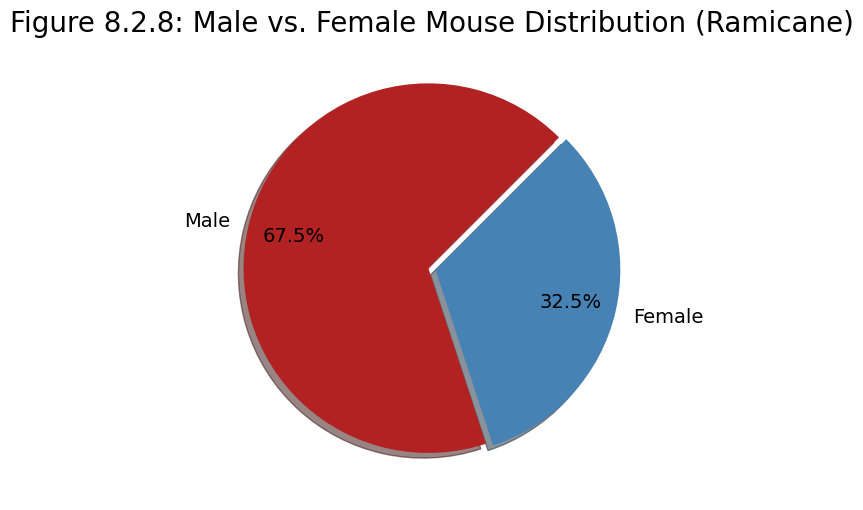

In [188]:
matplotlibx.display_pie_chart_from_series \
    (ramicane_mouse_count_by_gender_series, 
     'Figure 8.2.8: Male vs. Female Mouse Distribution (Ramicane)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Stelasyn)**

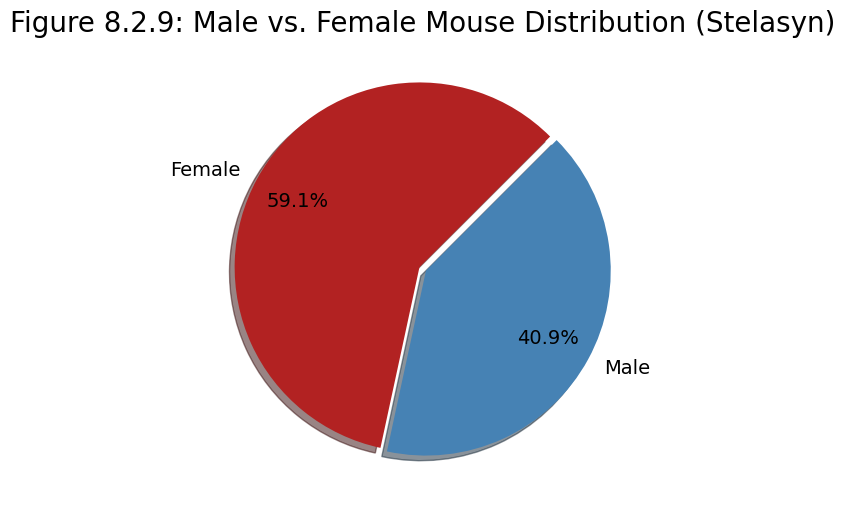

In [189]:
matplotlibx.display_pie_chart_from_series \
    (stelasyn_mouse_count_by_gender_series, 
     'Figure 8.2.9: Male vs. Female Mouse Distribution (Stelasyn)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (Zoniferol)**

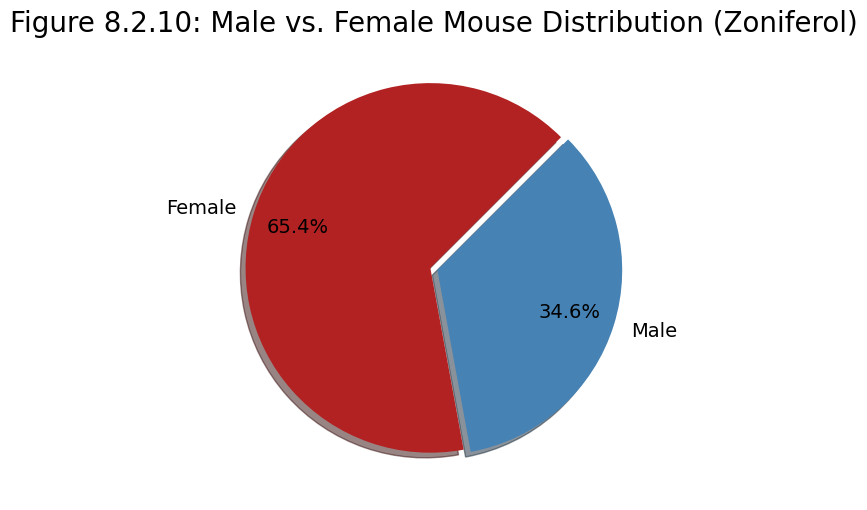

In [190]:
matplotlibx.display_pie_chart_from_series \
    (zoniferol_mouse_count_by_gender_series, 
     'Figure 8.2.10: Male vs. Female Mouse Distribution (Zoniferol)',
     pie_colors_string_list, explode_tuple)

### **Display Female vs. Male Distribution (All)**

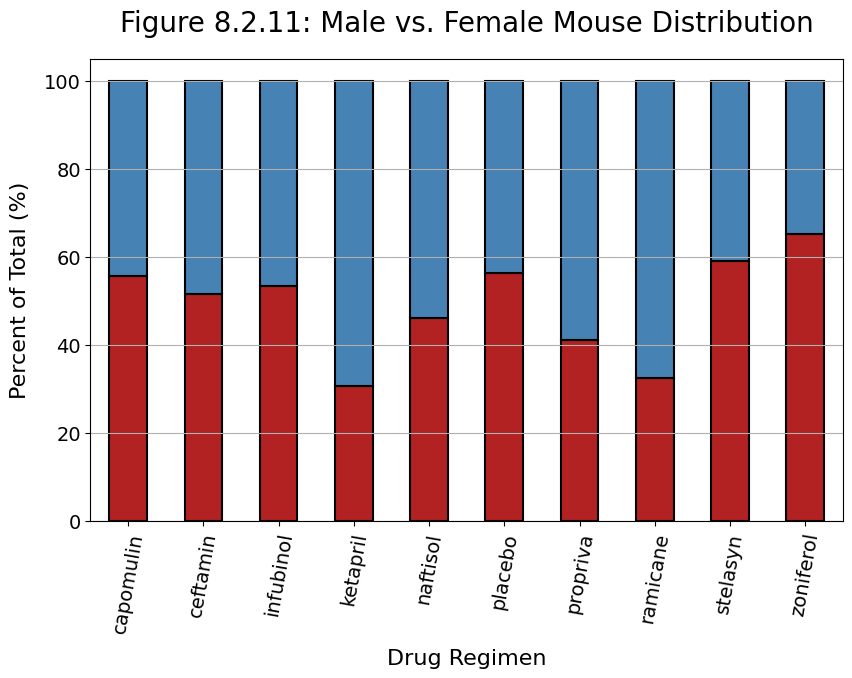

In [191]:
bar_colors_string_list = ['firebrick', 'steelblue']

matplotlibx.display_bar_chart_from_dataframe \
    (mouse_gender_percent_distribution_dataframe.transpose(),
     'Figure 8.2.11: Male vs. Female Mouse Distribution',
     'Drug Regimen', 'Percent of Total (%)',
     bar_colors_string_list, True)

In [192]:
#logx.end_program()